# SETUP

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from extract_cosine_similarities import load_dict , load_word2vec_models, calculate_cosine_similarities,create_bias_dataframe

data_folder_path = os.path.join('../0_data')
pipeline_folder_path = os.path.join('../2_pipeline/preprocessed')
tmp_folder_path =os.path.join('../2_pipeline/tmp')
bcp_null_path = os.path.join('../3_output/plot/bcp_null')
replication_results_folder_path = os.path.join('../3_output/replication/results')
replication_plot_folder_path = os.path.join('../3_output/replication/plots')
# create the folder if it does not exist
if not os.path.exists(replication_results_folder_path):
    os.makedirs(replication_results_folder_path)
if not os.path.exists(replication_plot_folder_path):
    os.makedirs(replication_plot_folder_path)
# Evaluations
foundations_path = os.path.join(data_folder_path, 'wordlist', 'dict_foundations.json')
foundations_chi_path = os.path.join(data_folder_path, 'wordlist', 'dict_foundations_chi.json')
foundations = load_dict(foundations_path)
foundations_chi = load_dict(foundations_chi_path)
evaluations_set= {'foundations': foundations}
evaluations_chi_set = {'foundations_chi': foundations_chi}

# Targets (e.g., age groups)
targets_path = os.path.join(data_folder_path, 'wordlist', 'dict_targets.json')
targets_chi_path = os.path.join(data_folder_path, 'wordlist', 'dict_targets_chi.json')
targets = load_dict(targets_path)
targets_chi = load_dict(targets_chi_path)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Figure 1: USSR

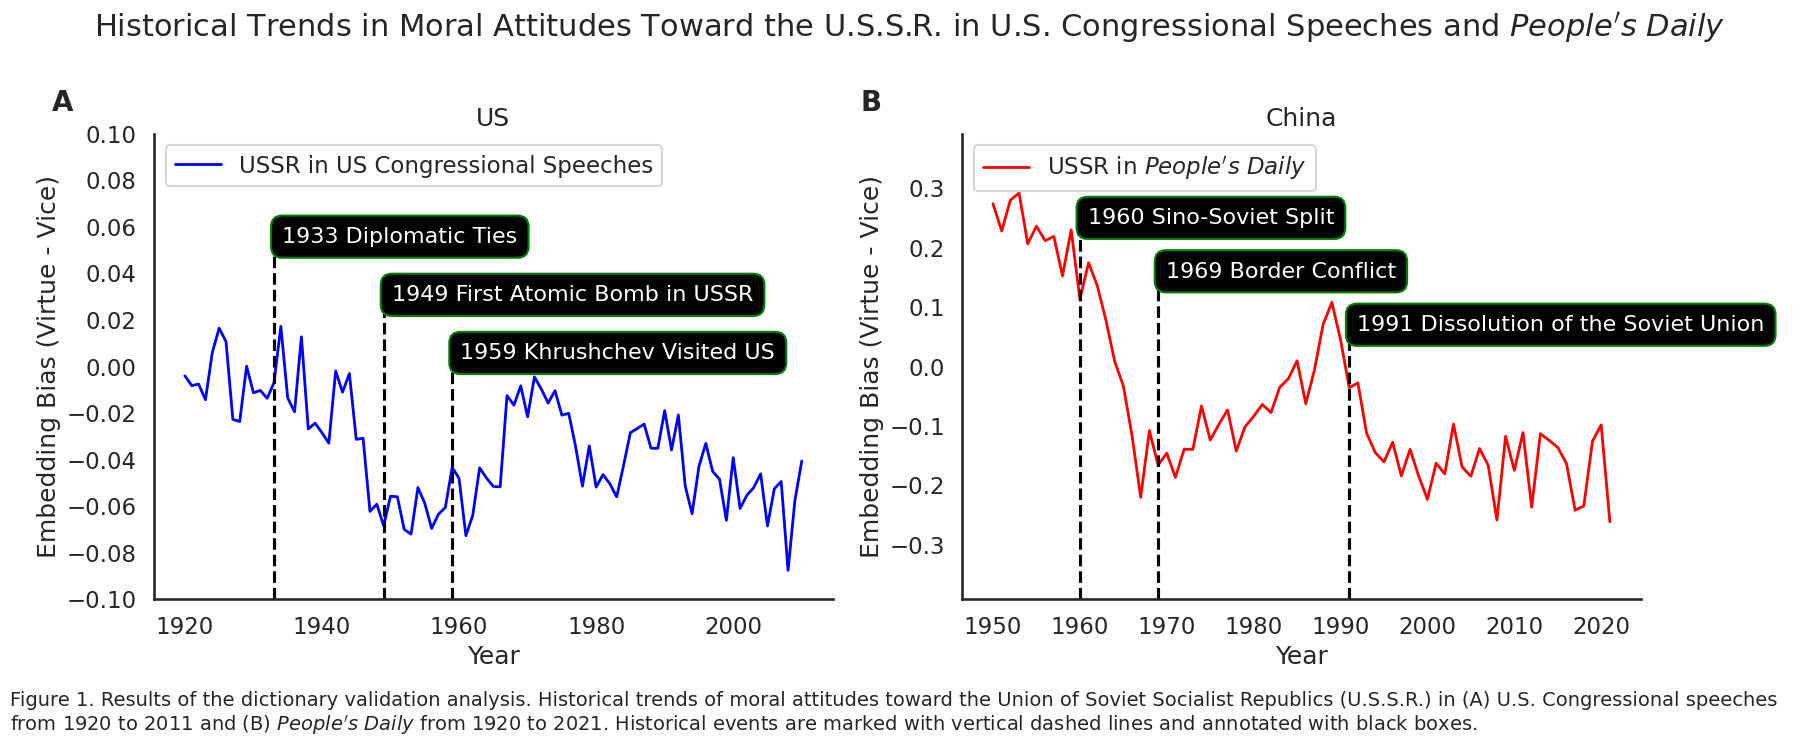

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import matplotlib as mpl

# Set the global font to be Arial
mpl.rc('font', family='Arial')
dfus = pd.read_csv(os.path.join(tmp_folder_path, 'dfus_ussr.csv'))
dfchi = pd.read_csv(os.path.join(tmp_folder_path, 'dfchi_ussr.csv'))

# Filter dfus
dfus1920 = dfus[dfus['year'] >= 1920]

# Determine maximum absolute y-value for both datasets
max_abs_val_us = dfus1920['SovietUnion_vir_vic_diff'].abs().max()
# round to 3 decimal places
max_abs_val_us = round(max_abs_val_us, 1)
max_abs_val_chi = dfchi['SovietUnion_vir_vic_diff'].abs().max()

# Set Seaborn style and context for larger fonts and white background
sns.set(style="white", context="talk")

# Create a side-by-side plot
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# US data
axes[0].plot(dfus1920['year'], dfus1920['SovietUnion_vir_vic_diff'], lw=2, color='blue', label='USSR in US Congressional Speeches')
# axes[0].axhline(y=0, color='grey', linestyle='--')
axes[0].set_ylim([-max_abs_val_us, max_abs_val_us])

# Set the font size for event labels
event_label_font_size = 16

# Event Labels and Lines for the US
us_events = {
    1933: '1933 Diplomatic Ties',
    1949: '1949 First Atomic Bomb in USSR',
    1959: '1959 Khrushchev Visited US',
}
y_position = max_abs_val_us - 0.04
for year, label in us_events.items():
    axes[0].text(year+1.2, y_position, label, verticalalignment='top',color='white',
                 fontsize=event_label_font_size,bbox=dict(facecolor='black', edgecolor='green', boxstyle='round,pad=0.5'))
    axes[0].axvline(x=year, ymin=-0.5, ymax=(y_position + max_abs_val_us) / (2 * max_abs_val_us), color='black', linestyle='--')
    y_position = y_position - 0.025
# y tick
axes[0].set_yticks([-0.1, -0.08, -0.06, -0.04, -0.02, 0, 0.02, 0.04, 0.06, 0.08, 0.1])
axes[0].legend(loc='upper left')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Embedding Bias (Virtue - Vice)')
axes[0].set_title('US')
sns.despine(ax=axes[0])
axes[0].text(-0.15, 1.05, 'A', transform=axes[0].transAxes, size=20, weight='bold')

# China data
axes[1].plot(dfchi['year'], dfchi['SovietUnion_vir_vic_diff'], lw=2, color='red', label='USSR in $\it{People\'s\ Daily}$')
# axes[1].axhline(y=0, color='grey', linestyle='--')
axes[1].set_ylim([-max_abs_val_chi-0.1, max_abs_val_chi+0.1])
# Event Labels and Lines for China
china_events = {
    1960: '1960 Sino-Soviet Split',
    1969: '1969 Border Conflict',
    1991: '1991 Dissolution of the Soviet Union'
}
y_position = max_abs_val_chi - 0.025
for year, label in china_events.items():
    axes[1].text(year+0.9, y_position, label, verticalalignment='top',color='white',
                 fontsize=event_label_font_size,bbox=dict(facecolor='black', edgecolor='green', boxstyle='round,pad=0.5'))
    axes[1].axvline(x=year, ymin=-0.5, ymax=(y_position + max_abs_val_chi+0.05) / (2.5 * max_abs_val_chi), color='black', linestyle='--')
    y_position = y_position - 0.09

             
axes[1].legend(loc='upper left')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Embedding Bias (Virtue - Vice)')
axes[1].set_title('China')
sns.despine(ax=axes[1])
axes[1].text(-0.15, 1.05, 'B', transform=axes[1].transAxes, size=20, weight='bold')
# Add a super title for the entire figure
fig.suptitle('Historical Trends in Moral Attitudes Toward the U.S.S.R. in U.S. Congressional Speeches and $\it{People\'s\ Daily}$', fontsize=22)

# Add a caption below the figure
# fig.text(0.5, -0.1, 
#          'Figure 1. The historical trend of moral attitudes toward the Union of Soviet Socialist Republics (U.S.S.R.) in (A) U.S. Congressional speeches and (B) $\it{People\'s\ Daily}$ from 1920 to the present. \nPanel A shows the embedding bias (Virtue - Vice) of U.S. Congressional speeches, indicating shifts in moral sentiment corresponding to significant events such as the establishment of diplomatic ties in 1933, the first atomic bomb in the U.S.S.R. in 1949, and Khrushchev\'s visit to the U.S. in 1959. \nPanel B displays the moral attitudes in China\'s People\'s Daily, with notable declines following the Sino-Soviet Split in 1960, the 1969 border conflict, and a slight recovery around the dissolution of the Soviet Union in 1991. Historical events are marked with vertical dashed lines and annotated with black boxes.',
#          ha='center', fontsize=12)
fig.text(0, -0.05, 
         'Figure 1. Results of the dictionary validation analysis. Historical trends of moral attitudes toward the Union of Soviet Socialist Republics (U.S.S.R.) in (A) U.S. Congressional speeches \nfrom 1920 to 2011 and (B) $\it{People\'s\ Daily}$ from 1920 to 2021. Historical events are marked with vertical dashed lines and annotated with black boxes.',
          fontsize=14)

plt.tight_layout()
# save the figure
plt.savefig(os.path.join(replication_plot_folder_path, 'F1.jpg'), dpi=600,format='jpg',  bbox_inches='tight')
plt.show()

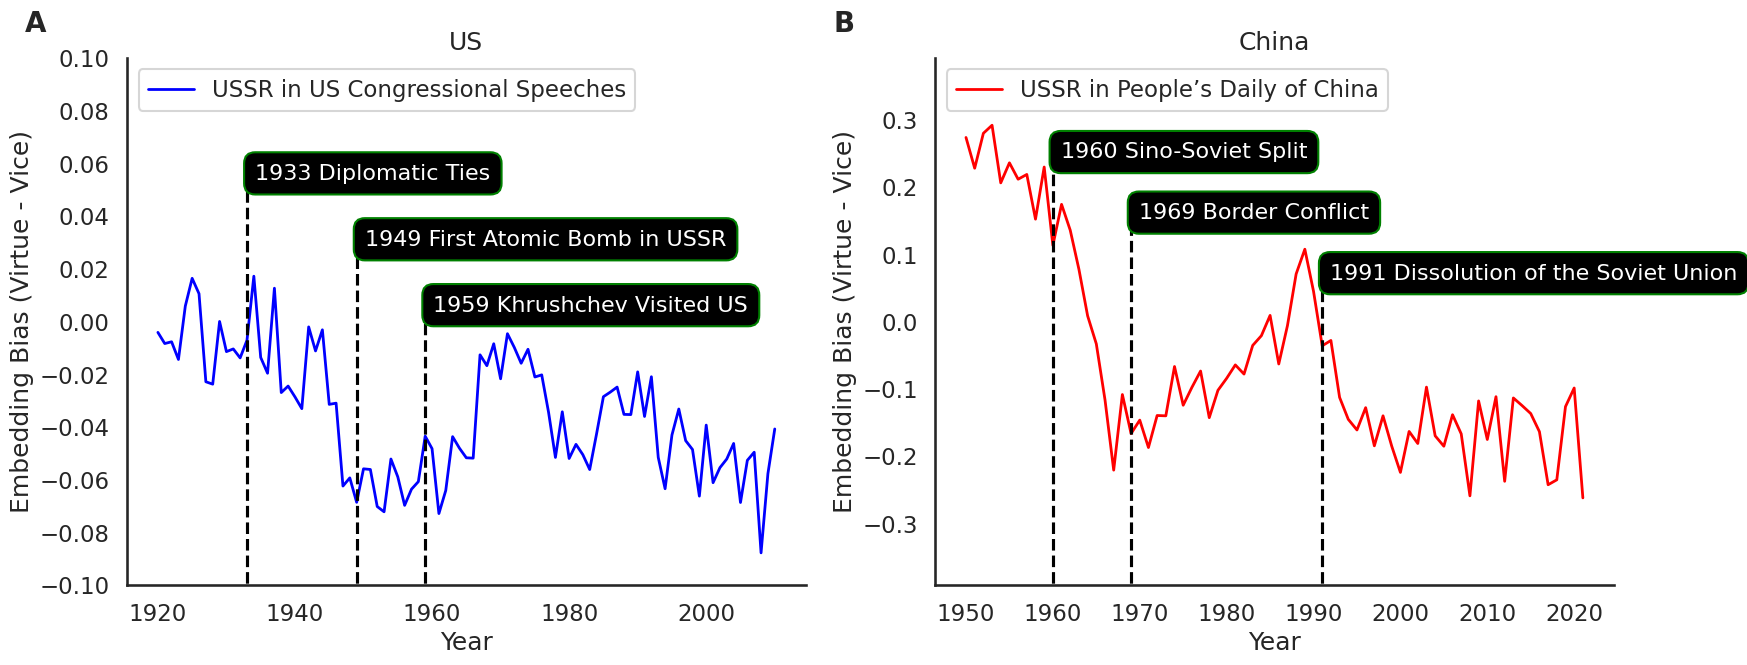

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import matplotlib as mpl

# Set the global font to be Arial
mpl.rc('font', family='Arial')
dfus = pd.read_csv(os.path.join(tmp_folder_path, 'dfus_ussr.csv'))
dfchi = pd.read_csv(os.path.join(tmp_folder_path, 'dfchi_ussr.csv'))

# Filter dfus
dfus1920 = dfus[dfus['year'] >= 1920]

# Determine maximum absolute y-value for both datasets
max_abs_val_us = dfus1920['SovietUnion_vir_vic_diff'].abs().max()
# round to 3 decimal places
max_abs_val_us = round(max_abs_val_us, 1)
max_abs_val_chi = dfchi['SovietUnion_vir_vic_diff'].abs().max()

# Set Seaborn style and context for larger fonts and white background
sns.set(style="white", context="talk")

# Create a side-by-side plot
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# US data
axes[0].plot(dfus1920['year'], dfus1920['SovietUnion_vir_vic_diff'], lw=2, color='blue', label='USSR in US Congressional Speeches')
axes[0].set_ylim([-max_abs_val_us, max_abs_val_us])

# Set the font size for event labels
event_label_font_size = 16

# Event Labels and Lines for the US
us_events = {
    1933: '1933 Diplomatic Ties',
    1949: '1949 First Atomic Bomb in USSR',
    1959: '1959 Khrushchev Visited US',
}
y_position = max_abs_val_us - 0.04
for year, label in us_events.items():
    axes[0].text(year + 1.2, y_position, label, verticalalignment='top', color='white',
                 fontsize=event_label_font_size, bbox=dict(facecolor='black', edgecolor='green', boxstyle='round,pad=0.5'))
    axes[0].axvline(x=year, ymin=-0.5, ymax=(y_position + max_abs_val_us) / (2 * max_abs_val_us), color='black', linestyle='--')
    y_position = y_position - 0.025

# y tick
axes[0].set_yticks([-0.1, -0.08, -0.06, -0.04, -0.02, 0, 0.02, 0.04, 0.06, 0.08, 0.1])
axes[0].legend(loc='upper left')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Embedding Bias (Virtue - Vice)')
axes[0].set_title('US')
sns.despine(ax=axes[0])
axes[0].text(-0.15, 1.05, 'A', transform=axes[0].transAxes, size=20, weight='bold')

# China data
axes[1].plot(dfchi['year'], dfchi['SovietUnion_vir_vic_diff'], lw=2, color='red', label='USSR in People’s Daily of China')
axes[1].set_ylim([-max_abs_val_chi - 0.1, max_abs_val_chi + 0.1])

# Event Labels and Lines for China
china_events = {
    1960: '1960 Sino-Soviet Split',
    1969: '1969 Border Conflict',
    1991: '1991 Dissolution of the Soviet Union'
}
y_position = max_abs_val_chi - 0.025
for year, label in china_events.items():
    axes[1].text(year + 0.9, y_position, label, verticalalignment='top', color='white',
                 fontsize=event_label_font_size, bbox=dict(facecolor='black', edgecolor='green', boxstyle='round,pad=0.5'))
    axes[1].axvline(x=year, ymin=-0.5, ymax=(y_position + max_abs_val_chi + 0.05) / (2.5 * max_abs_val_chi), color='black', linestyle='--')
    y_position = y_position - 0.09

axes[1].legend(loc='upper left')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Embedding Bias (Virtue - Vice)')
axes[1].set_title('China')
sns.despine(ax=axes[1])
axes[1].text(-0.15, 1.05, 'B', transform=axes[1].transAxes, size=20, weight='bold')

plt.tight_layout()
# Save the figure
plt.savefig(os.path.join(replication_plot_folder_path, 'F1.jpg'), dpi=600, format='jpg', bbox_inches='tight')
plt.show()


# Figure 2: US

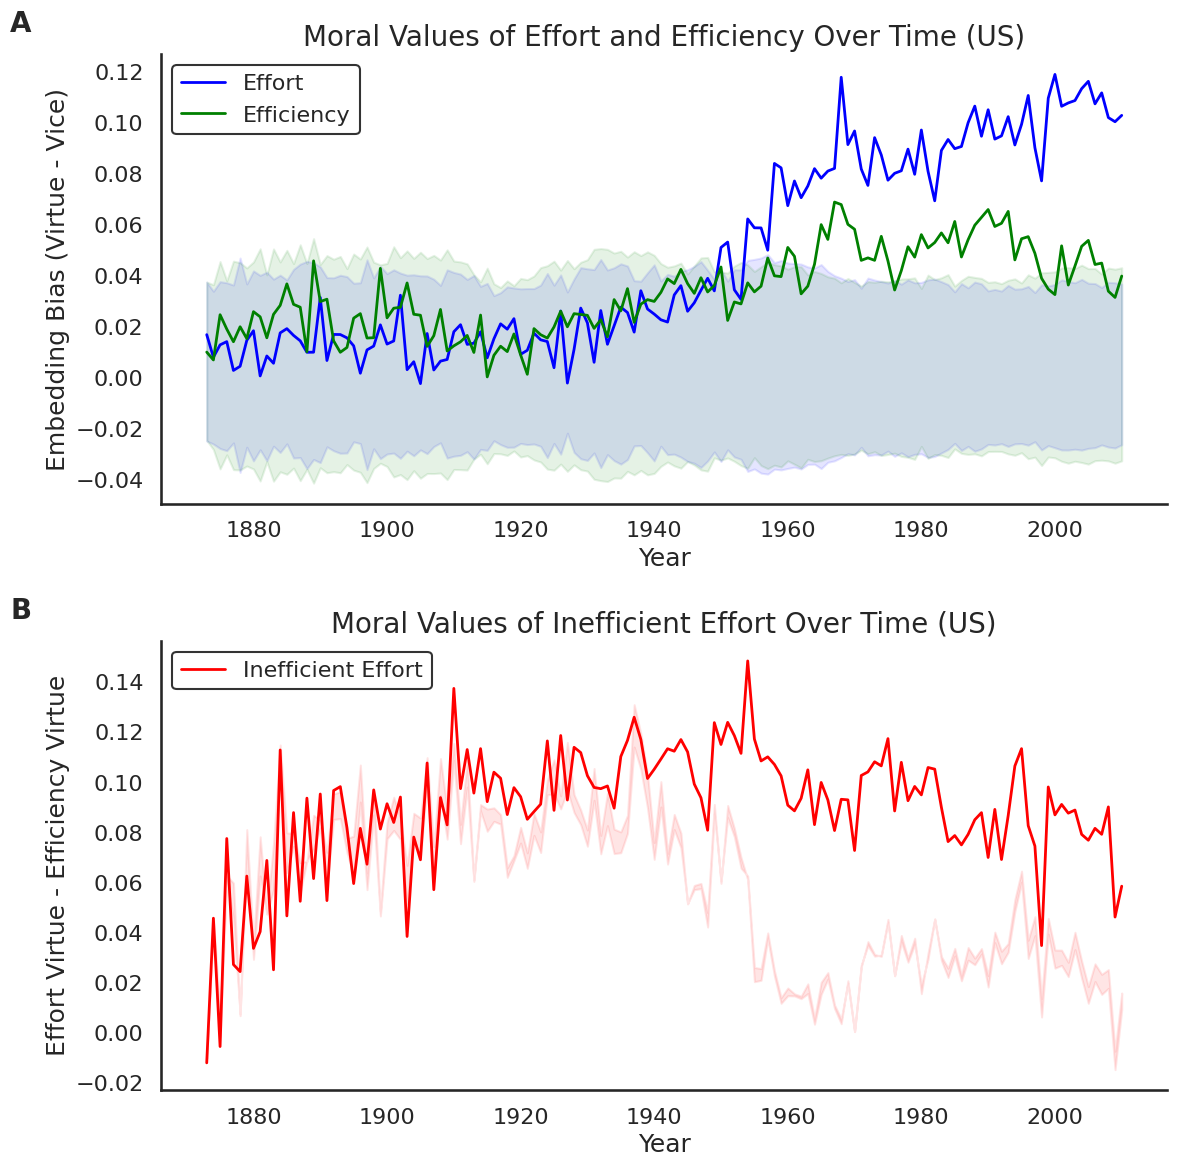

In [3]:
dfus = pd.read_csv(os.path.join(pipeline_folder_path, 'foundations.csv'))
dfusnull_final = pd.read_csv(os.path.join(tmp_folder_path, 'us_trueword10000_all.csv'))
dfusnull_final['effort_diff'] = dfusnull_final['effort_virtue'] - dfusnull_final['effort_vice']
dfusnull_final['efficiency_diff'] = dfusnull_final['efficiency_virtue'] - dfusnull_final['efficiency_vice']
dfusnull_lowerq = dfusnull_final.groupby(['year']).quantile(0.025)
dfusnull_upperq = dfusnull_final.groupby(['year']).quantile(0.975)
# # diff
# dfusnull_upperq['effort_vir_vic_diff'] = dfusnull_upperq['effort_virtue'] - dfusnull_upperq['effort_vice']
# dfusnull_lowerq['effort_vir_vic_diff'] = dfusnull_lowerq['effort_virtue'] - dfusnull_lowerq['effort_vice']
# dfusnull_upperq['efficiency_vir_vic_diff'] = dfusnull_upperq['efficiency_virtue'] - dfusnull_upperq['efficiency_vice']
# dfusnull_lowerq['efficiency_vir_vic_diff'] = dfusnull_lowerq['efficiency_virtue'] - dfusnull_lowerq['efficiency_vice']

# Set the global font to be Arial, size 18
mpl.rc('font', family='Arial', size=18)

sns.set_style("white")
sns.set_context("talk")  

# Create a figure with 2 rows and 1 column (i.e., two panels stacked vertically)
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
effort_color = 'blue'
efficiency_color = 'green'
# First Plot (Effort and Efficiency) for dfus
ax[0].plot(dfus['year'], dfus['effort_virtue'] - dfus['effort_vice'], color=effort_color, label='Effort', linewidth=2)
ax[0].fill_between(dfus['year'], dfusnull_lowerq['effort_diff'], dfusnull_upperq['effort_diff'], color=effort_color, alpha=.1)
ax[0].plot(dfus['year'], dfus['efficiency_virtue'] - dfus['efficiency_vice'], color=efficiency_color, label='Efficiency', linewidth=2)
ax[0].fill_between(dfus['year'], dfusnull_lowerq['efficiency_diff'], dfusnull_upperq['efficiency_diff'], color=efficiency_color, alpha=.1)
ax[0].set_title("Moral Values of Effort and Efficiency Over Time (US)", fontsize=20)
ax[0].text(-0.15, 1.05, 'A', transform=ax[0].transAxes, size=20, weight='bold')
ax[0].set_xlabel("Year", fontsize=18)
ax[0].set_ylabel("Embedding Bias (Virtue - Vice)", fontsize=18)
ax[0].tick_params(axis='both', labelsize=16)

# Second Plot (Inefficient Effort) for dfus
ax[1].plot(dfus['year'], dfus['effort_virtue'] - dfus['efficiency_virtue'], color='red', label='Inefficient Effort', linewidth=2)
ax[1].fill_between(dfus['year'], dfusnull_lowerq['effort_virtue'] - dfusnull_lowerq['efficiency_virtue'] , dfusnull_upperq['effort_virtue'] - dfusnull_upperq['efficiency_virtue'], color='red', alpha=.1)

ax[1].set_title("Moral Values of Inefficient Effort Over Time (US)", fontsize=20)
ax[1].set_xlabel("Year", fontsize=18)
ax[1].set_ylabel("Effort Virtue - Efficiency Virtue", fontsize=18)
ax[1].tick_params(axis='both', labelsize=16)
ax[1].text(-0.15, 1.05, 'B', transform=ax[1].transAxes, size=20, weight='bold')
ax[1].legend(loc='upper left')

# Shared aesthetics for both plots
for axis in ax:
    sns.despine(ax=axis)
    leg = axis.legend(loc='upper left', frameon=True, fontsize=16)
    leg.get_frame().set_edgecolor('black')

plt.tight_layout()
# save
plt.savefig(os.path.join(replication_plot_folder_path, 'F2.jpg'), dpi=600,format='jpg',  bbox_inches='tight')
# Show the combined plot
plt.show()


# Figure 3: China

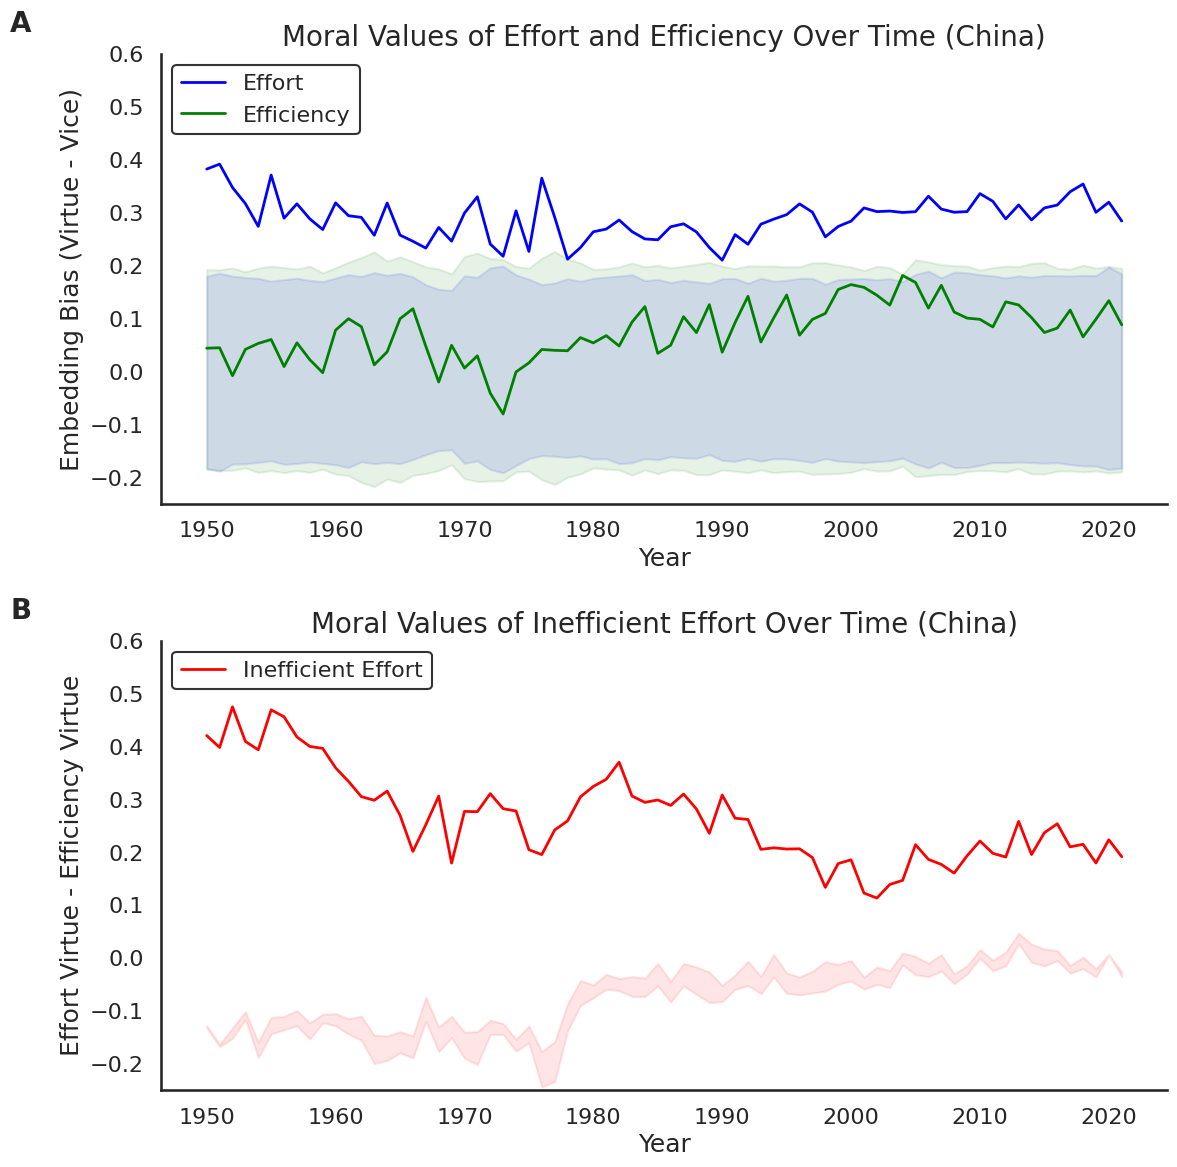

In [4]:
dfchi = pd.read_csv(os.path.join(pipeline_folder_path, 'foundations_chi.csv'))
dfchinull_final = pd.read_csv(os.path.join(tmp_folder_path, 'null10000_chi_all.csv'))
dfchinull_final['effort_diff'] = dfchinull_final['effort_virtue'] - dfchinull_final['effort_vice']
dfchinull_final['efficiency_diff'] = dfchinull_final['efficiency_virtue'] - dfchinull_final['efficiency_vice']
dfchinull_lowerq = dfchinull_final.groupby(['year']).quantile(0.025)
dfchinull_upperq = dfchinull_final.groupby(['year']).quantile(0.975)
# dfchinull_lowerq = pd.read_csv(os.path.join(tmp_folder_path, 'null10000_chi_lowerq.csv'))
# dfchinull_lowerq['effort_diff'] = dfchinull_lowerq['effort_virtue'] - dfchinull_lowerq['effort_vice']
# dfchinull_lowerq['efficiency_diff'] = dfchinull_lowerq['efficiency_virtue'] - dfchinull_lowerq['efficiency_vice']

# dfchinull_upperq = pd.read_csv(os.path.join(tmp_folder_path, 'null10000_chi_upperq.csv'))
# dfchinull_upperq['effort_diff'] = dfchinull_upperq['effort_virtue'] - dfchinull_upperq['effort_vice']
# dfchinull_upperq['efficiency_diff'] = dfchinull_upperq['efficiency_virtue'] - dfchinull_upperq['efficiency_vice']

# Set the global font to be Arial, size 18
mpl.rc('font', family='Arial', size=18)
effort_color = 'blue'
efficiency_color = 'green'


sns.set_style("white")
sns.set_context("talk")  

# Create a figure with 2 row and 1 columns (i.e., two panels up and down)
fig, ax = plt.subplots(2, 1, figsize=(12, 12))


# First Plot (Effort and Efficiency)
ax[0].plot(dfchi['year'], dfchi['effort_virtue'] - dfchi['effort_vice'], color=effort_color, label='Effort', linewidth=2)
ax[0].fill_between(dfchi['year'], dfchinull_lowerq['effort_diff'], dfchinull_upperq['effort_diff'], color=effort_color, alpha=.1)
ax[0].plot(dfchi['year'], dfchi['efficiency_virtue'] - dfchi['efficiency_vice'], color=efficiency_color, label='Efficiency', linewidth=2)

ax[0].fill_between(dfchi['year'], dfchinull_lowerq['efficiency_diff'], dfchinull_upperq['efficiency_diff'], color=efficiency_color, alpha=.1)
ax[0].set_title("Moral Values of Effort and Efficiency Over Time (China)", fontsize=20)
ax[0].set_ylim(-0.25, 0.6)
ax[0].set_xlabel("Year", fontsize=18)
ax[0].set_ylabel("Embedding Bias (Virtue - Vice)", fontsize=18)
ax[0].tick_params(axis='both', labelsize=16)
ax[0].text(-0.15, 1.05, 'A', transform=ax[0].transAxes, size=20, weight='bold')
# Second Plot (Inefficient Effort)
ax[1].plot(dfchi['year'], dfchi['effort_virtue'] - dfchi['efficiency_virtue'], color='red', label='Inefficient Effort', linewidth=2)
ax[1].fill_between(dfchi['year'], dfchinull_lowerq['effort_virtue'] - dfchinull_lowerq['efficiency_virtue'], dfchinull_upperq['effort_virtue'] - dfchinull_upperq['efficiency_virtue'], color='red', alpha=.1)
ax[1].set_title("Moral Values of Inefficient Effort Over Time (China)", fontsize=20)
ax[1].set_xlabel("Year", fontsize=18)
ax[1].set_ylabel("Effort Virtue - Efficiency Virtue", fontsize=18)
ax[1].tick_params(axis='both', labelsize=16)
ax[1].set_ylim(-0.25, 0.6)
ax[1].legend(loc='upper left')
ax[1].text(-0.15, 1.05, 'B', transform=ax[1].transAxes, size=20, weight='bold')

# Shared aesthetics for both plots
for axis in ax:
    sns.despine(ax=axis)
    leg = axis.legend(loc='upper left', frameon=True, fontsize=16)
    leg.get_frame().set_edgecolor('black')


plt.tight_layout()
# save
plt.savefig(os.path.join(replication_plot_folder_path, 'F3.jpg'), dpi=600,format='jpg',  bbox_inches='tight')

# Show the combined plot
plt.show()

In [5]:
# number of rows in dfchinull_final
dfchinull_final.shape

(720000, 8)

# Supplementary Figure 1: Number of tokens

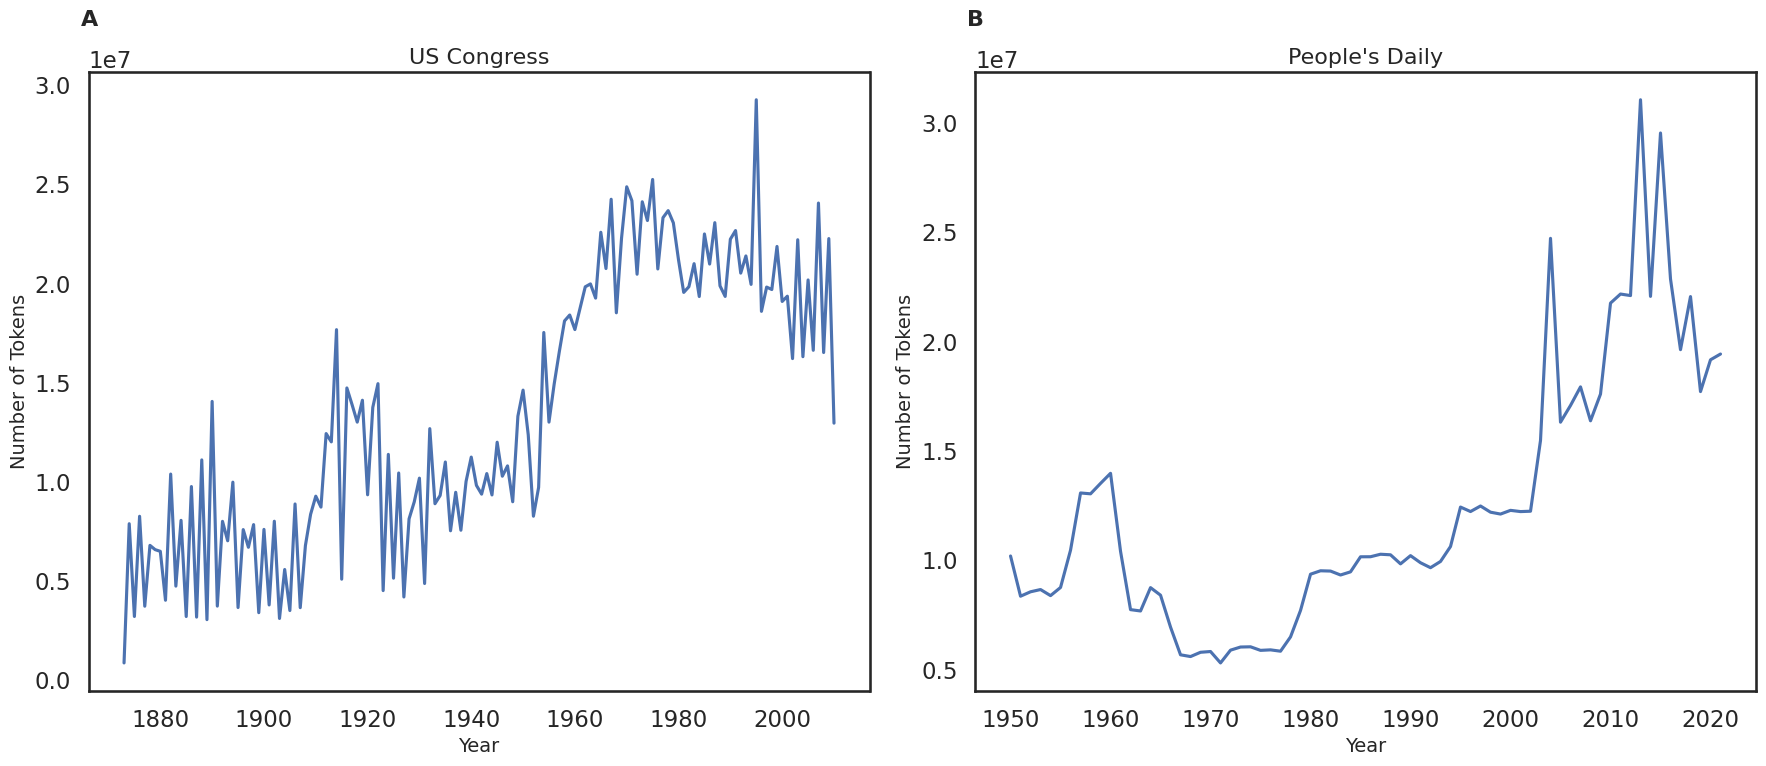

In [6]:

# Load the token counts
df_token_counts_us = pd.read_csv('../2_pipeline/out/token_counts_us.csv')
df_token_counts_chi = pd.read_csv('../2_pipeline/out/token_counts_chi.csv')

# Setting plot style and size
plt.figure(figsize=(18, 8), facecolor='white')


# Plot for US corpus
ax1 = plt.subplot(1, 2, 1)
ax1.plot(df_token_counts_us['Year'], df_token_counts_us['token_counts'], label='US Congress')
ax1.set_title('US Congress', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Tokens', fontsize=14)


# Adding label 'A' in the upper left corner
ax1.text(-0.01, 1.1, 'A', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top')

# Plot for China corpus
ax2 = plt.subplot(1, 2, 2)
ax2.plot(df_token_counts_chi['Year'], df_token_counts_chi['token_counts'], label='People\'s Daily')
ax2.set_title('People\'s Daily', fontsize=16)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Number of Tokens', fontsize=14)


# Adding label 'B' in the upper left corner
ax2.text(-0.01, 1.1, 'B', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top')

# Adjust layout to make space for the title
plt.tight_layout()
# save
plt.savefig(os.path.join(replication_plot_folder_path, 'SF1.jpg'), dpi=600,format='jpg',  bbox_inches='tight')
plt.show()

# Supplementary Figure 2: COHA

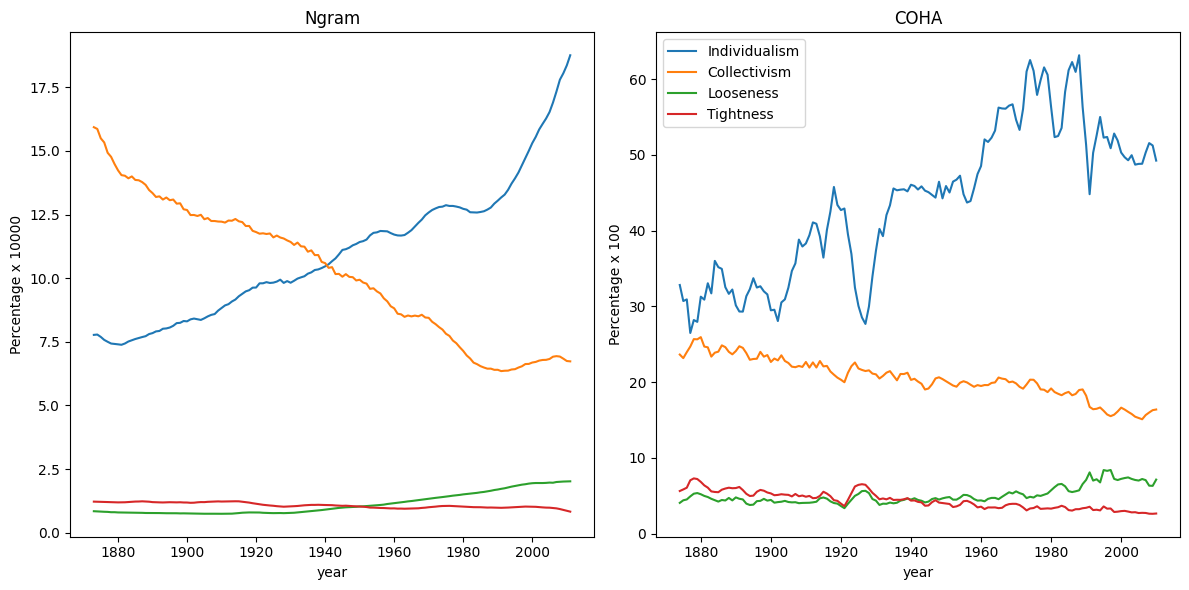

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# reset the global font to default
mpl.rcdefaults()
dfngram = pd.read_csv(os.path.join(data_folder_path, 'external', 'culturalvalues_EngAme.csv'))
dfcoha = pd.read_csv(os.path.join(pipeline_folder_path, 'ngram_coha_comparison.csv'))
df_merged = pd.merge(dfngram, dfcoha, left_on='year',right_on='Year', how='left')
# drop na
df_merged = df_merged.dropna()
# delete duplicate columns and rename without suffix: 'year_x', 'coll_x', 'indi_x', 'loose_x', 'tight_x', 'year_y', 'coll_y',
    #    'indi_y', 'loose_y', 'tight_y',
df_merged = df_merged.drop(columns=['coll_y', 'indi_y', 'loose_y', 'tight_y', 'year_y'])
df_merged = df_merged.rename(columns={'coll_x': 'coll', 'indi_x': 'indi', 'loose_x': 'loose', 'tight_x': 'tight', 'Year': 'year'})

# List of cultural value words, assuming they are named the same in dfcoha or adapted accordingly
words = ['indi', 'coll', 'loose', 'tight']
# times 100 to get percentage of words columns
for word in words:
    # scaling
    df_merged[f'{word}_ngram'] = df_merged[f'{word}']*100000
    df_merged[f'{word}_coha'] = df_merged[f'{word}_%']*100
    # Create smoothed columns with a rolling window of 3 as the same as the Google-Ngram default
    df_merged[f'{word}_coha_smoothed'] = df_merged[f'{word}_coha'].rolling(window=3, center=True).mean()

labels = ['Individualism', 'Collectivism', 'Looseness', 'Tightness']
# fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # Increased plot width
for i, word in enumerate(words):
    sns.lineplot(data=df_merged, x='year', y=f'{word}_ngram', ax=axs[0])
    sns.lineplot(data=df_merged, x='year', y=f'{word}_coha_smoothed', ax=axs[1], label=f'{labels[i]}')

axs[0].set_title('Ngram')
axs[1].set_title('COHA')
axs[0].set_ylabel('Percentage x 10000')
axs[1].set_ylabel('Percentage x 100')
plt.tight_layout()
# save
plt.savefig(os.path.join(replication_plot_folder_path, 'SF2.jpg'), dpi=600,format='jpg',  bbox_inches='tight')
plt.show()

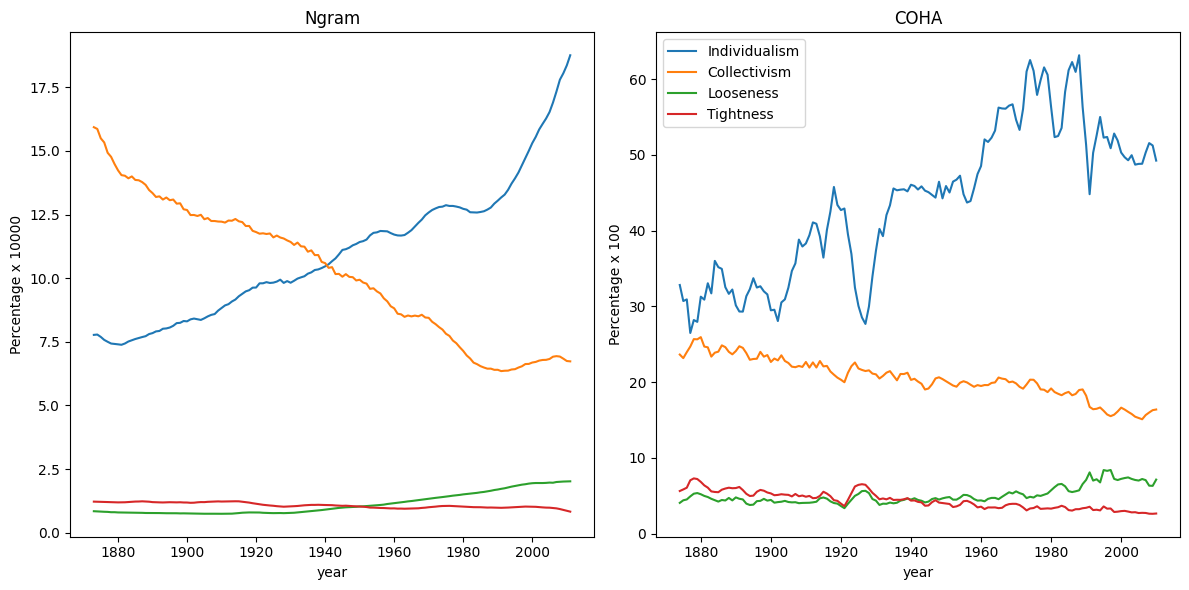

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# reset the global font to default
mpl.rcdefaults()
dfngram = pd.read_csv(os.path.join(data_folder_path, 'external', 'culturalvalues_EngAme.csv'))
dfcoha = pd.read_csv(os.path.join(pipeline_folder_path, 'ngram_coha_comparison.csv'))
df_merged = pd.merge(dfngram, dfcoha, left_on='year',right_on='Year', how='left')
# drop na
df_merged = df_merged.dropna()
# delete duplicate columns and rename without suffix: 'year_x', 'coll_x', 'indi_x', 'loose_x', 'tight_x', 'year_y', 'coll_y',
    #    'indi_y', 'loose_y', 'tight_y',
df_merged = df_merged.drop(columns=['coll_y', 'indi_y', 'loose_y', 'tight_y', 'year_y'])
df_merged = df_merged.rename(columns={'coll_x': 'coll', 'indi_x': 'indi', 'loose_x': 'loose', 'tight_x': 'tight', 'Year': 'year'})

# List of cultural value words, assuming they are named the same in dfcoha or adapted accordingly
words = ['indi', 'coll', 'loose', 'tight']
# times 100 to get percentage of words columns
for word in words:
    # scaling
    df_merged[f'{word}_ngram'] = df_merged[f'{word}']*100000
    df_merged[f'{word}_coha'] = df_merged[f'{word}_%']*100
    # Create smoothed columns with a rolling window of 3 as the same as the Google-Ngram default
    df_merged[f'{word}_coha_smoothed'] = df_merged[f'{word}_coha'].rolling(window=3, center=True).mean()

labels = ['Individualism', 'Collectivism', 'Looseness', 'Tightness']
# fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # Increased plot width
for i, word in enumerate(words):
    sns.lineplot(data=df_merged, x='year', y=f'{word}_ngram', ax=axs[0])
    sns.lineplot(data=df_merged, x='year', y=f'{word}_coha_smoothed', ax=axs[1], label=f'{labels[i]}')

axs[0].set_title('Ngram')
axs[1].set_title('COHA')
axs[0].set_ylabel('Percentage x 10000')
axs[1].set_ylabel('Percentage x 100')
plt.tight_layout()
# save
plt.savefig(os.path.join(replication_plot_folder_path, 'SF2.jpg'), dpi=600,format='jpg',  bbox_inches='tight')
plt.show()

# Supplementary Figure 3: Moral values by foundations

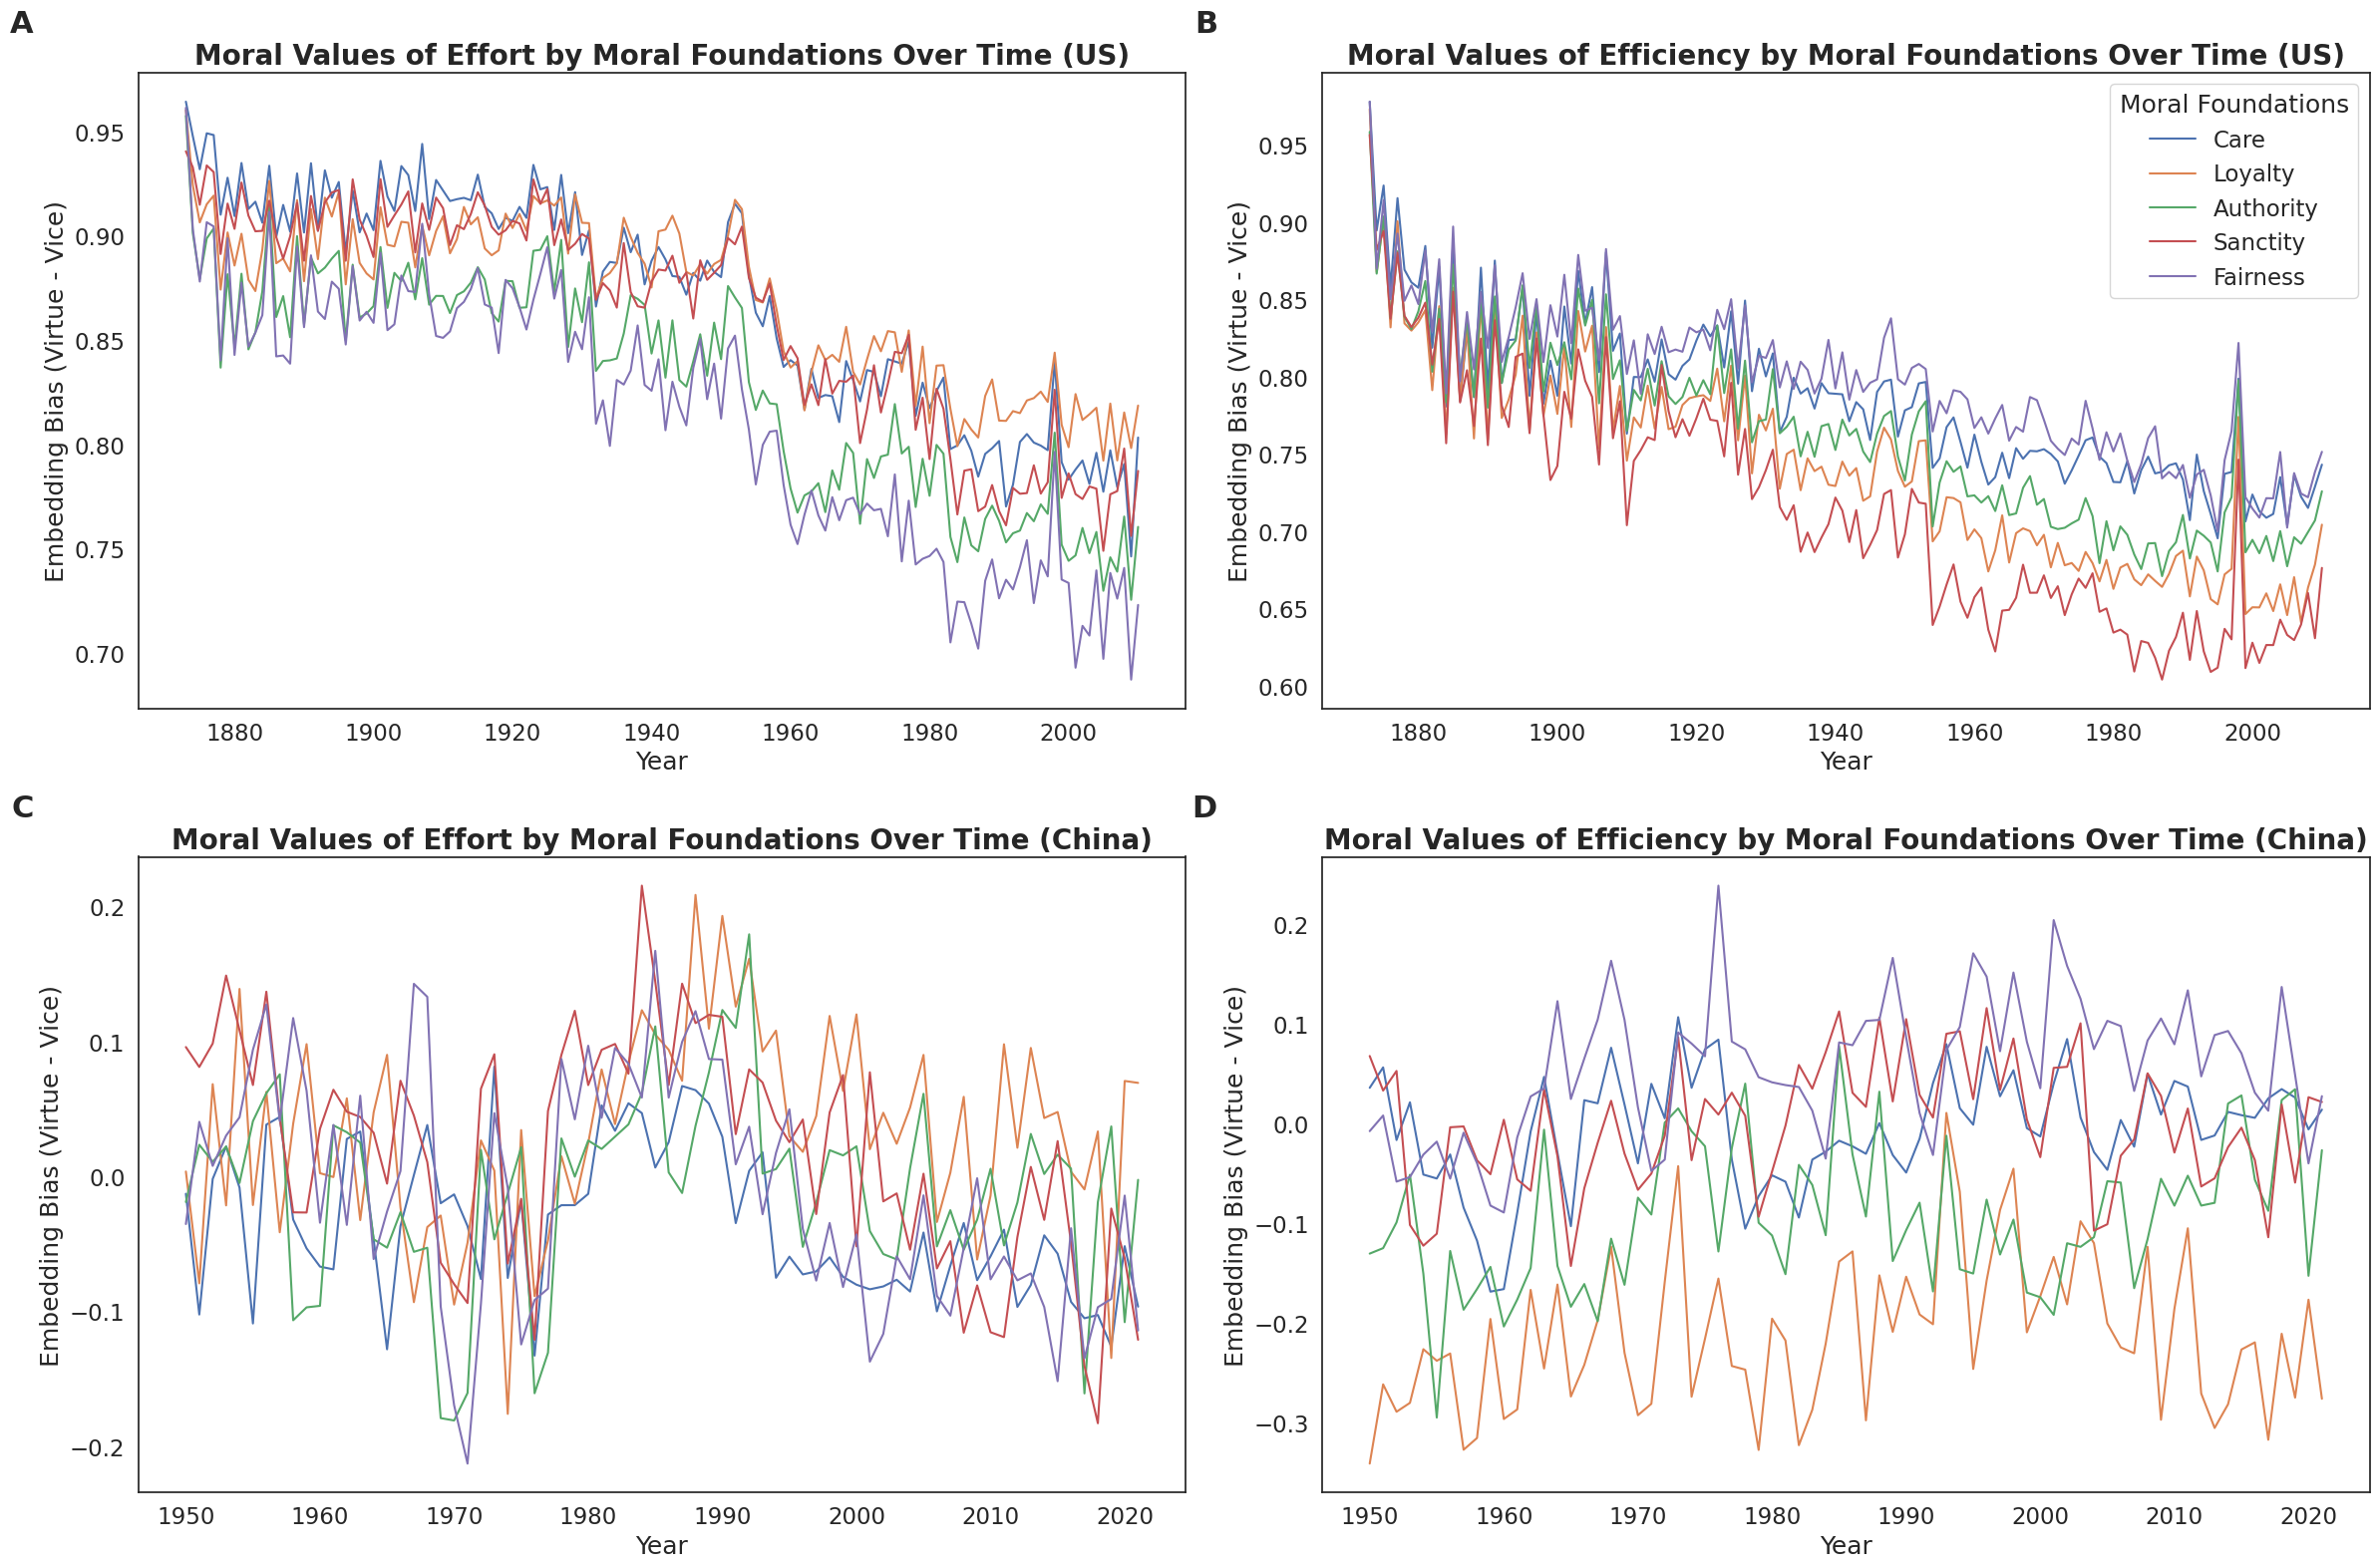

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load final data
df = pd.read_csv(os.path.join(pipeline_folder_path, 'foundations.csv'))
df = df.dropna()
# sort by year
df['year'] = df['year'].astype(int)
df = df.sort_values('year')

dfchi = pd.read_csv(os.path.join(pipeline_folder_path, 'foundations_chi.csv'))
dfchi = dfchi.dropna()
dfchi['year'] = dfchi['year'].astype(int)
dfchi = dfchi.sort_values('year')
# Assume 'df' is preloaded with the necessary data
sns.set(style="white", font_scale=1.5)  # Setting the font scale for larger fonts

foundations = ['care', 'loya', 'auth', 'sanc', 'fare']
foundation_full_names = ['Care', 'Loyalty', 'Authority', 'Sanctity', 'Fairness']

targets = ['effort', 'efficiency']
fig, axs = plt.subplots(2, 2, figsize=(24, 16))  # 2x2 subplot grid

for i, category in enumerate(targets):
    for j, data in enumerate([(df, 'US'), (dfchi, 'China')]):
        ax = axs[j, i]  # Navigate through subplots
        for foundation, name in zip(foundations, foundation_full_names):
            # Suppress legend for the second row by setting the label to "_nolegend_"
            ax.plot(data[0]['year'], data[0][f'{category}_{foundation}'], label=name if j == 0 else "_nolegend_")

        ax.set_xlabel('Year')
        ax.set_ylabel('Embedding Bias (Virtue - Vice)')
        ax.set_title(f'Moral Values of {category.capitalize()} by Moral Foundations Over Time ({data[1]})',fontweight='bold',fontsize=20)
        # Only add a legend to the first row's plots
        if j == 0 and i ==1:
            ax.legend(title='Moral Foundations')
        # add label A B C D to the subplots
        ax.text(-0.1, 1.1,  f'{chr(65 + i + 2*j)}', transform=ax.transAxes, fontsize=22, fontweight='bold', va='top', ha='right')

plt.tight_layout()
# save the figure
plt.savefig(os.path.join(replication_plot_folder_path, 'SF3.jpg'), dpi=600,format='jpg',  bbox_inches='tight')

plt.show()

#  Supplementary Figure 4: Probability Means from Bayesian Change Point Detection

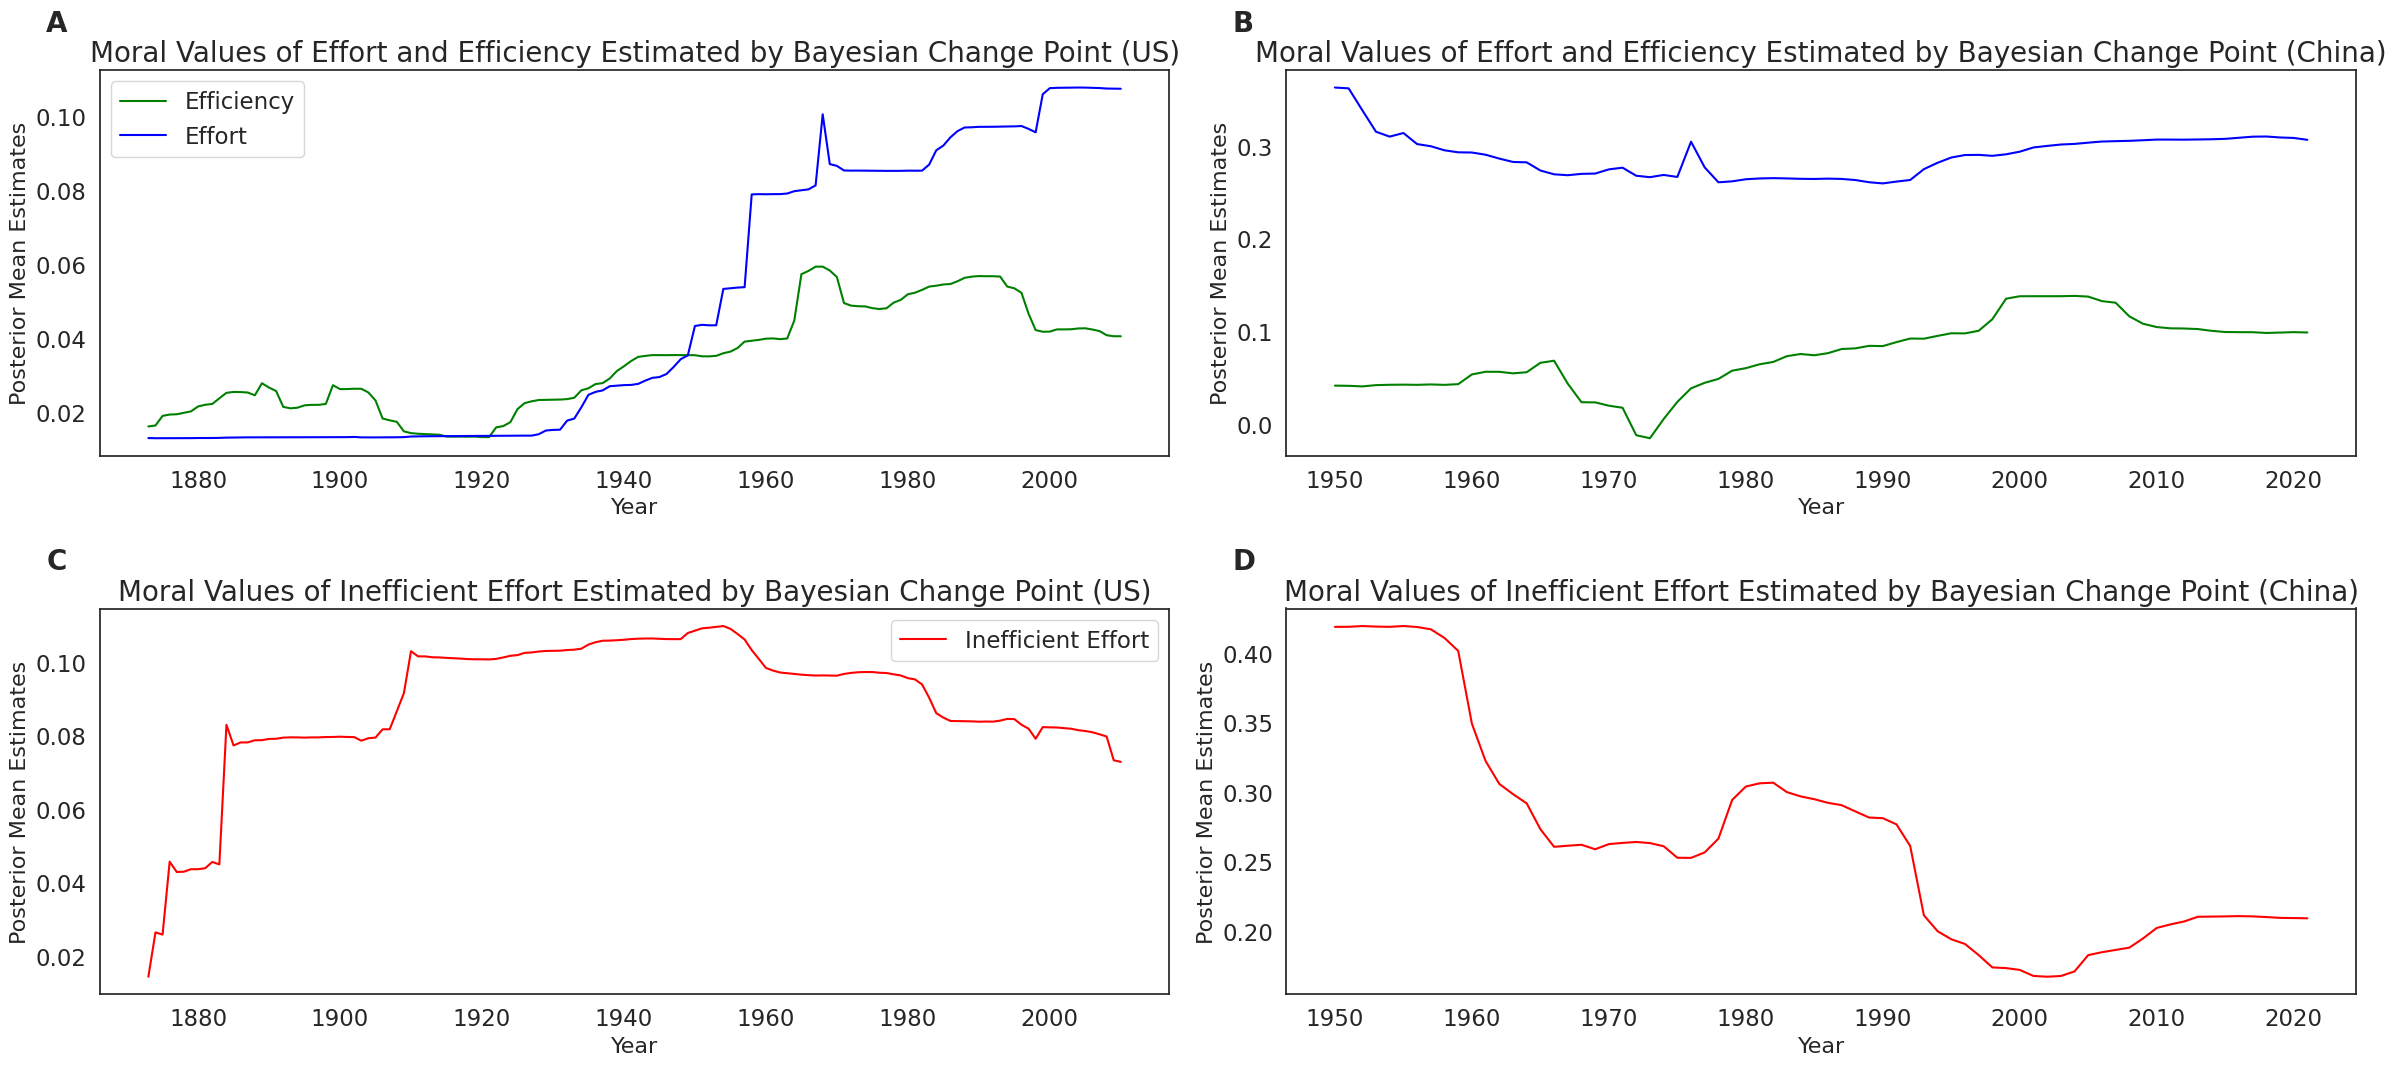

In [10]:
import matplotlib.pyplot as plt

# Load the data
script_dir = os.path.dirname(os.path.abspath('__file__'))
output_folder_path = os.path.join(script_dir, '..', '3_output')
folder_path = os.path.join(output_folder_path, 'results','bcp/')
chi_efficiency = pd.read_csv(f'{folder_path}chi_efficiency.csv').sort_values('Year')
chi_effort = pd.read_csv(f'{folder_path}chi_effort.csv').sort_values('Year')
chi_effort_efficiency_virtue = pd.read_csv(f'{folder_path}chi_effort_efficiency_virtue.csv').sort_values('Year')
us_efficiency = pd.read_csv(f'{folder_path}efficiency_us.csv').sort_values('Year')
us_effort = pd.read_csv(f'{folder_path}effort_us.csv').sort_values('Year')
us_effort_efficiency_virtue = pd.read_csv(f'{folder_path}us_effort_efficiency_virtue.csv').sort_values('Year')

# Define where each set of data is plotted
subplot_label_positions = (-0.05, 1.1)  # Position for subplot labels

# Setup the plot
fig, axs = plt.subplots(2, 2, figsize=(24, 12))

# Plot for US
axs[0, 0].plot(us_efficiency['Year'], us_efficiency['Means'], label='Efficiency', color='green')
axs[0, 0].plot(us_effort['Year'], us_effort['Means'], label='Effort', color='blue')
axs[0, 0].set_title('Moral Values of Effort and Efficiency Estimated by Bayesian Change Point (US)', fontsize=20)
axs[0, 0].set_xlabel('Year', fontsize=16)
axs[0, 0].set_ylabel('Posterior Mean Estimates', fontsize=16)
axs[0, 0].legend()
axs[0, 0].annotate('A', xy=subplot_label_positions, xycoords='axes fraction', fontsize=20, fontweight='bold')

axs[1, 0].plot(us_effort_efficiency_virtue['Year'], us_effort_efficiency_virtue['Means'], label='Inefficient Effort', color='red')
axs[1, 0].set_title('Moral Values of Inefficient Effort Estimated by Bayesian Change Point (US)', fontsize=20)
axs[1, 0].set_xlabel('Year', fontsize=16)
axs[1, 0].set_ylabel('Posterior Mean Estimates', fontsize=16)
axs[1, 0].legend()
axs[1, 0].annotate('C', xy=subplot_label_positions, xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot for China
axs[0, 1].plot(chi_efficiency['Year'], chi_efficiency['Means'], label='Efficiency', color='green')
axs[0, 1].plot(chi_effort['Year'], chi_effort['Means'], label='Effort', color='blue')
axs[0, 1].set_title('Moral Values of Effort and Efficiency Estimated by Bayesian Change Point (China)', fontsize=20)
axs[0, 1].set_xlabel('Year', fontsize=16)
axs[0, 1].set_ylabel('Posterior Mean Estimates', fontsize=16)

axs[0, 1].annotate('B', xy=subplot_label_positions, xycoords='axes fraction', fontsize=20, fontweight='bold')

axs[1, 1].plot(chi_effort_efficiency_virtue['Year'], chi_effort_efficiency_virtue['Means'], color='red')
axs[1, 1].set_title('Moral Values of Inefficient Effort Estimated by Bayesian Change Point (China)', fontsize=20)
axs[1, 1].set_xlabel('Year', fontsize=16)
axs[1, 1].set_ylabel('Posterior Mean Estimates', fontsize=16)
axs[1, 1].annotate('D', xy=subplot_label_positions, xycoords='axes fraction', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# save the figure
plt.savefig(os.path.join(replication_plot_folder_path, 'SF4.jpg'), dpi=600,format='jpg',  bbox_inches='tight')

plt.show()


# Supplementary Figure 5: Moral values seperated by parties

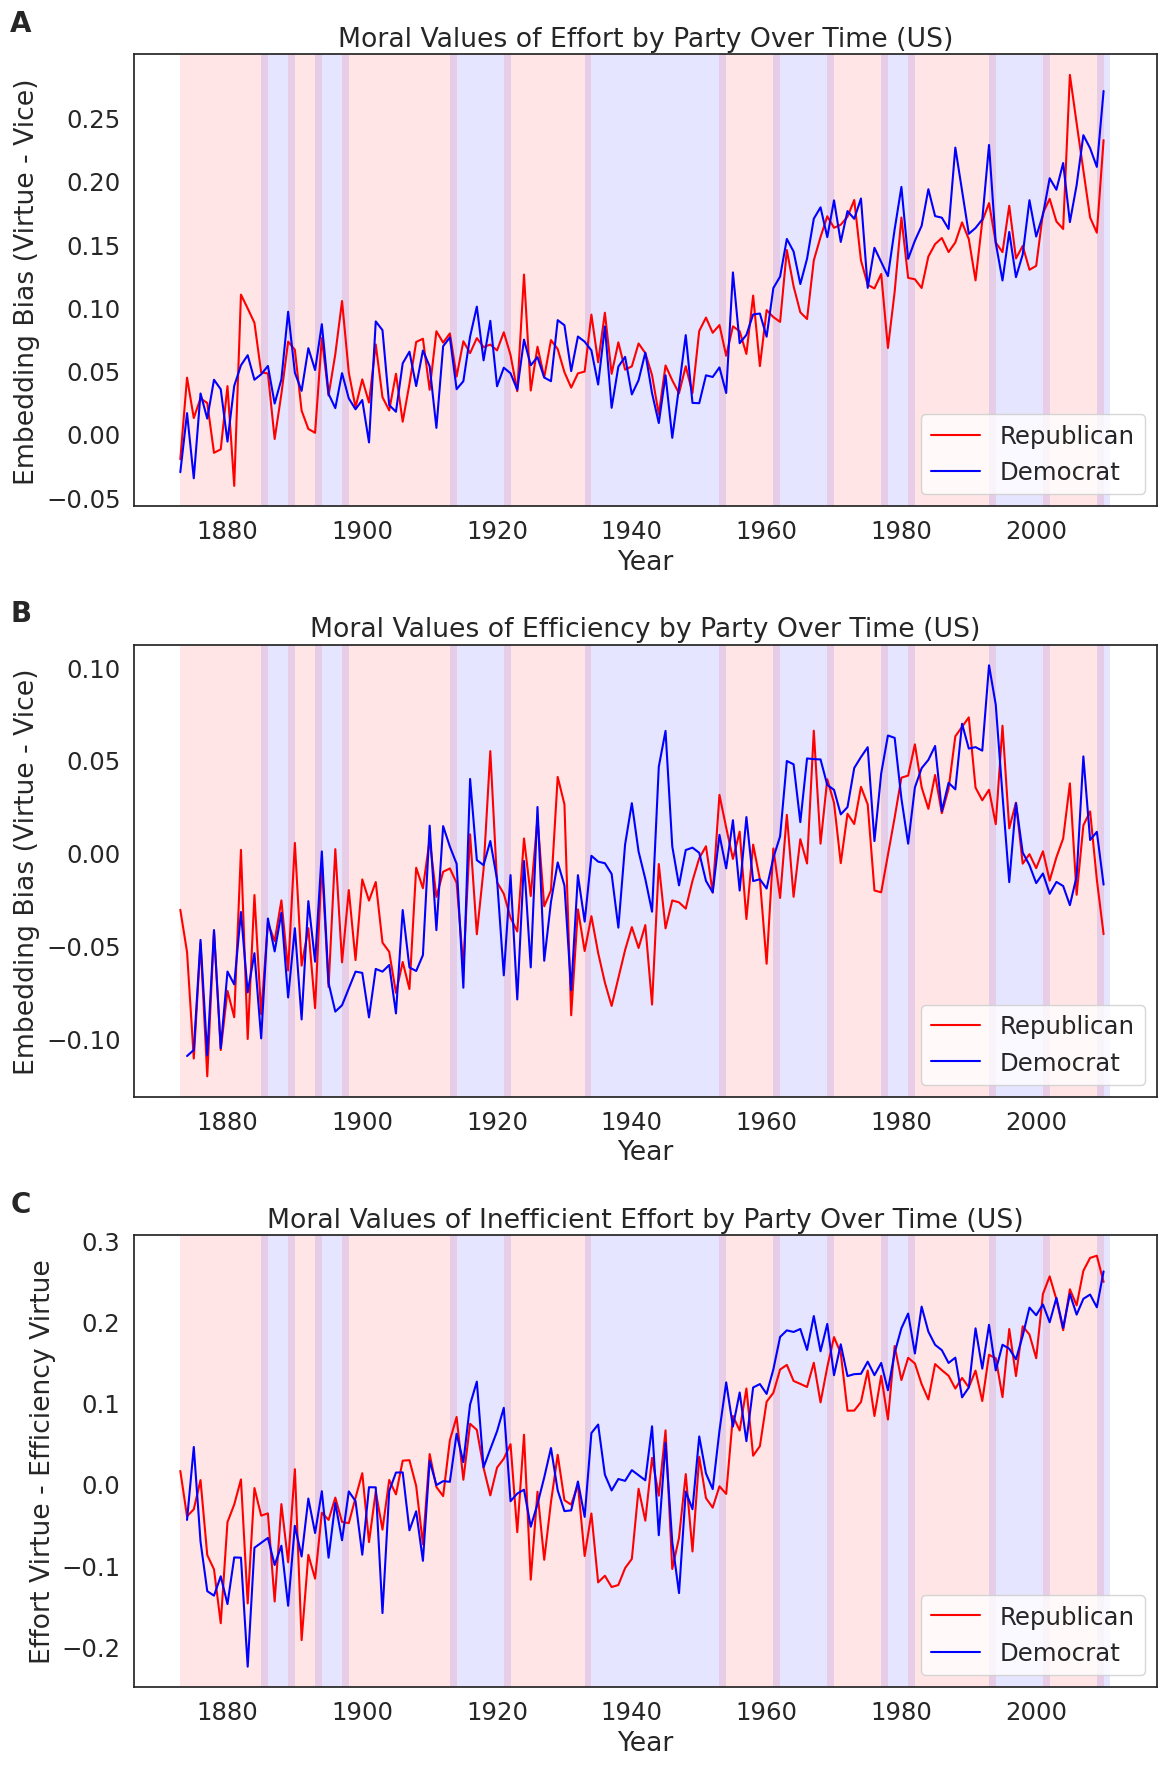

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Load the bias DataFrames
external_path = os.path.join(os.path.dirname(script_dir), '0_data/external')
Rdfbias = pd.read_csv(os.path.join(pipeline_folder_path, 'foundations_R.csv'))
Ddfbias = pd.read_csv(os.path.join(pipeline_folder_path, 'foundations_D.csv'))
# load party_government_year
party_government_year = pd.read_csv(os.path.join(external_path, 'party_government_year.csv'))
# merge by year
dfbias = pd.merge(Rdfbias, Ddfbias, on='year', suffixes=('_R', '_D'))

# Merge this with the party_government_year to get the party information per year
dfbias = dfbias.merge(party_government_year[['year', 'Presidency_party']], on='year', how='left')
dfbias['inefficient_effort_R'] = dfbias['effort_virtue_R'] - dfbias['efficiency_virtue_R']
dfbias['inefficient_effort_D'] = dfbias['effort_virtue_D'] - dfbias['efficiency_virtue_D']
# delete duplicate rows
dfbias = dfbias.drop_duplicates()
# Set the style
sns.set(style="white", font_scale=1.6)

# Create a figure to hold the subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=False)

# Define the labels for each subplot
subplot_labels = ['A', 'B', 'C']

# Plot for Effort
sns.lineplot(ax=axs[0], data=dfbias, x='year', y='effort_vir_vic_diff_R', color='red', label='Republican')
sns.lineplot(ax=axs[0], data=dfbias, x='year', y='effort_vir_vic_diff_D', color='blue', label='Democrat')
axs[0].text(-0.1, 1.1, subplot_labels[0], transform=axs[0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axs[0].set_title('Moral Values of Effort by Party Over Time (US)')
axs[0].set_ylabel('Embedding Bias (Virtue - Vice)')
axs[0].set_xlabel('Year')
# Plot for Efficiency
sns.lineplot(ax=axs[1], data=dfbias, x='year', y='efficiency_vir_vic_diff_R', color='red', label='Republican')
sns.lineplot(ax=axs[1], data=dfbias, x='year', y='efficiency_vir_vic_diff_D', color='blue', label='Democrat')
axs[1].text(-0.1, 1.1, subplot_labels[1], transform=axs[1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axs[1].set_title('Moral Values of Efficiency by Party Over Time (US)')
axs[1].set_ylabel('Embedding Bias (Virtue - Vice)')
axs[1].set_xlabel('Year')
# Plot for Inefficient Effort
sns.lineplot(ax=axs[2], data=dfbias, x='year', y='inefficient_effort_R', color='red', label='Republican')
sns.lineplot(ax=axs[2], data=dfbias, x='year', y='inefficient_effort_D', color='blue', label='Democrat')
axs[2].text(-0.1, 1.1, subplot_labels[2], transform=axs[2].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axs[2].set_title('Moral Values of Inefficient Effort by Party Over Time (US)')
axs[2].set_ylabel('Effort Virtue - Efficiency Virtue')
axs[2].set_xlabel('Year')
# Adding background color based on presidency
party_colors = {'Republican': 'red', 'Democrat': 'blue'}
for ax in axs:
    for _, row in dfbias.iterrows():
        ax.axvspan(row['year'], row['year']+1, facecolor=party_colors[row['Presidency_party']], alpha=0.1, edgecolor = 'none')

# Adjust the subplot layout
plt.tight_layout()
# save the figure
plt.savefig(os.path.join(replication_plot_folder_path, 'SF5.jpg'), dpi=600,format='jpg',  bbox_inches='tight')

# Show the plot
plt.show()

# Supplementary Figure 6: Difficulty as Improvement

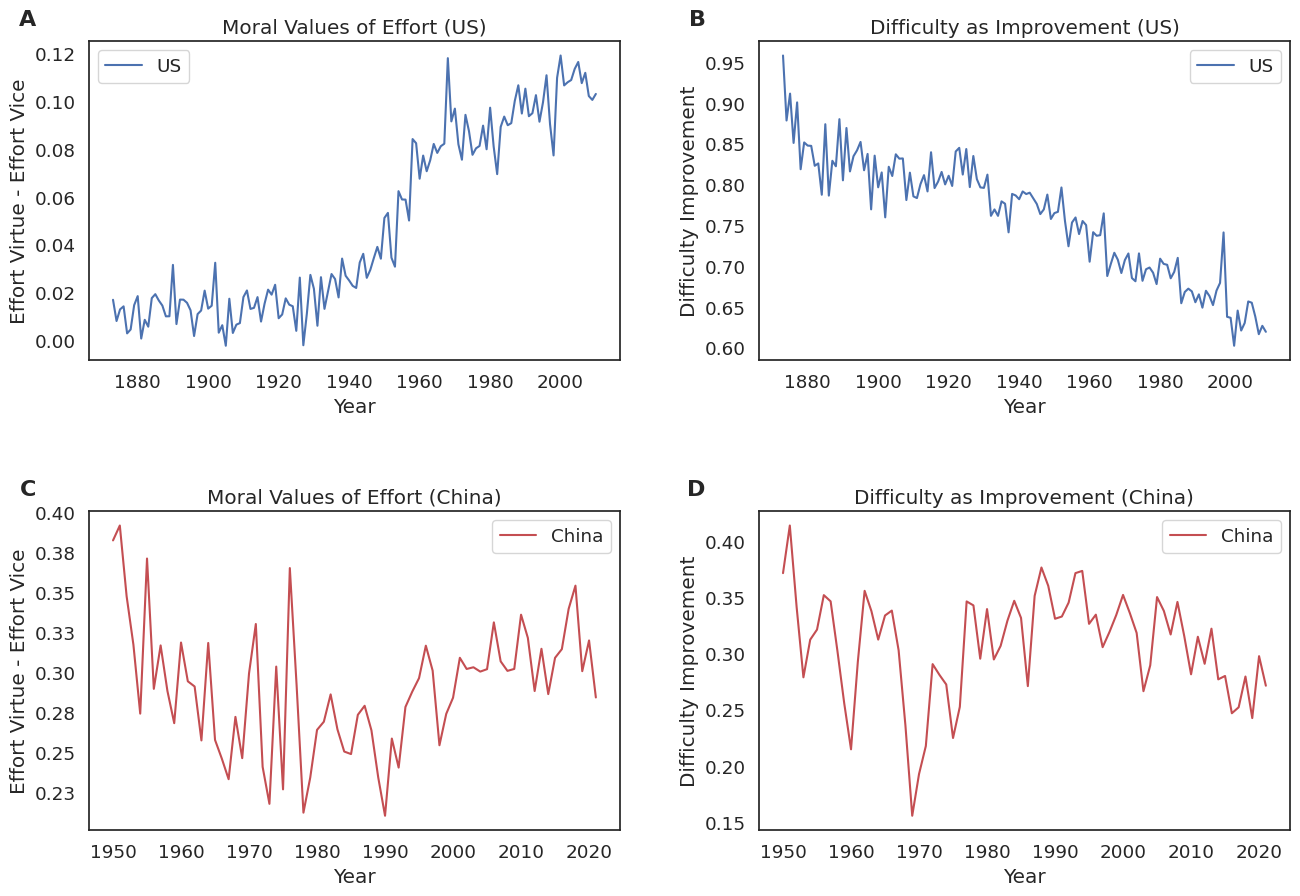

In [12]:
dfdiff = pd.read_csv(os.path.join(pipeline_folder_path, 'bias_difficulty_improvement.csv'))
dfdiff_chi = pd.read_csv(os.path.join(pipeline_folder_path, 'bias_difficulty_improvement_chi.csv'))
# set year as integer
dfeffort = pd.read_csv('../2_pipeline/out/merged_us.csv')
dfeffort_chi = pd.read_csv('../2_pipeline/out/merged_chi.csv')
# merge by year
dfus = pd.merge(dfdiff, dfeffort, on='year', how='left')
dfchi = pd.merge(dfdiff_chi, dfeffort_chi, on='year', how='left')


# Adjust plot settings
sns.set(style="white", font_scale=1.2)  # Increase font scale for better readability

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Adjusted for better fit

# Define the plots for US data
sns.lineplot(data=dfus, x='year', y='effort_vir_vic_diff', ax=axs[0, 0], color='b', label='US')
axs[0, 0].set_title('Moral Values of Effort (US)')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Effort Virtue - Effort Vice')
axs[0, 0].text(-0.1, 1.1, 'A', transform=axs[0, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

sns.lineplot(data=dfus, x='year', y='Difficulty_Improvement', ax=axs[0,1], color='b', label='US')
axs[0, 1].set_title('Difficulty as Improvement (US)')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Difficulty Improvement')
axs[0, 1].text(-0.1, 1.1, 'B', transform=axs[0,1].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Define the plots for China data
sns.lineplot(data=dfchi, x='year', y='effort_vir_vic_diff', ax=axs[1,0], color='r', label='China')
axs[1, 0].set_title('Moral Values of Effort (China)')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Effort Virtue - Effort Vice')
# make y ticks only 2 decimal
axs[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
axs[1, 0].text(-0.1, 1.1, 'C',  transform=axs[1,0].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

sns.lineplot(data=dfchi, x='year', y='Difficulty_Improvement', ax=axs[1, 1], color='r', label='China')
axs[1, 1].set_title('Difficulty as Improvement (China)')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Difficulty Improvement')
axs[1, 1].text(-0.1, 1.1, 'D', transform=axs[1, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Improve layout
plt.tight_layout(pad=3.0)  # Add padding to prevent overlap
# save the figure
plt.savefig(os.path.join(replication_plot_folder_path, 'SF6.jpg'), dpi=600,format='jpg',  bbox_inches='tight')

plt.show()


# Supplementary Figure 7: Sentiments

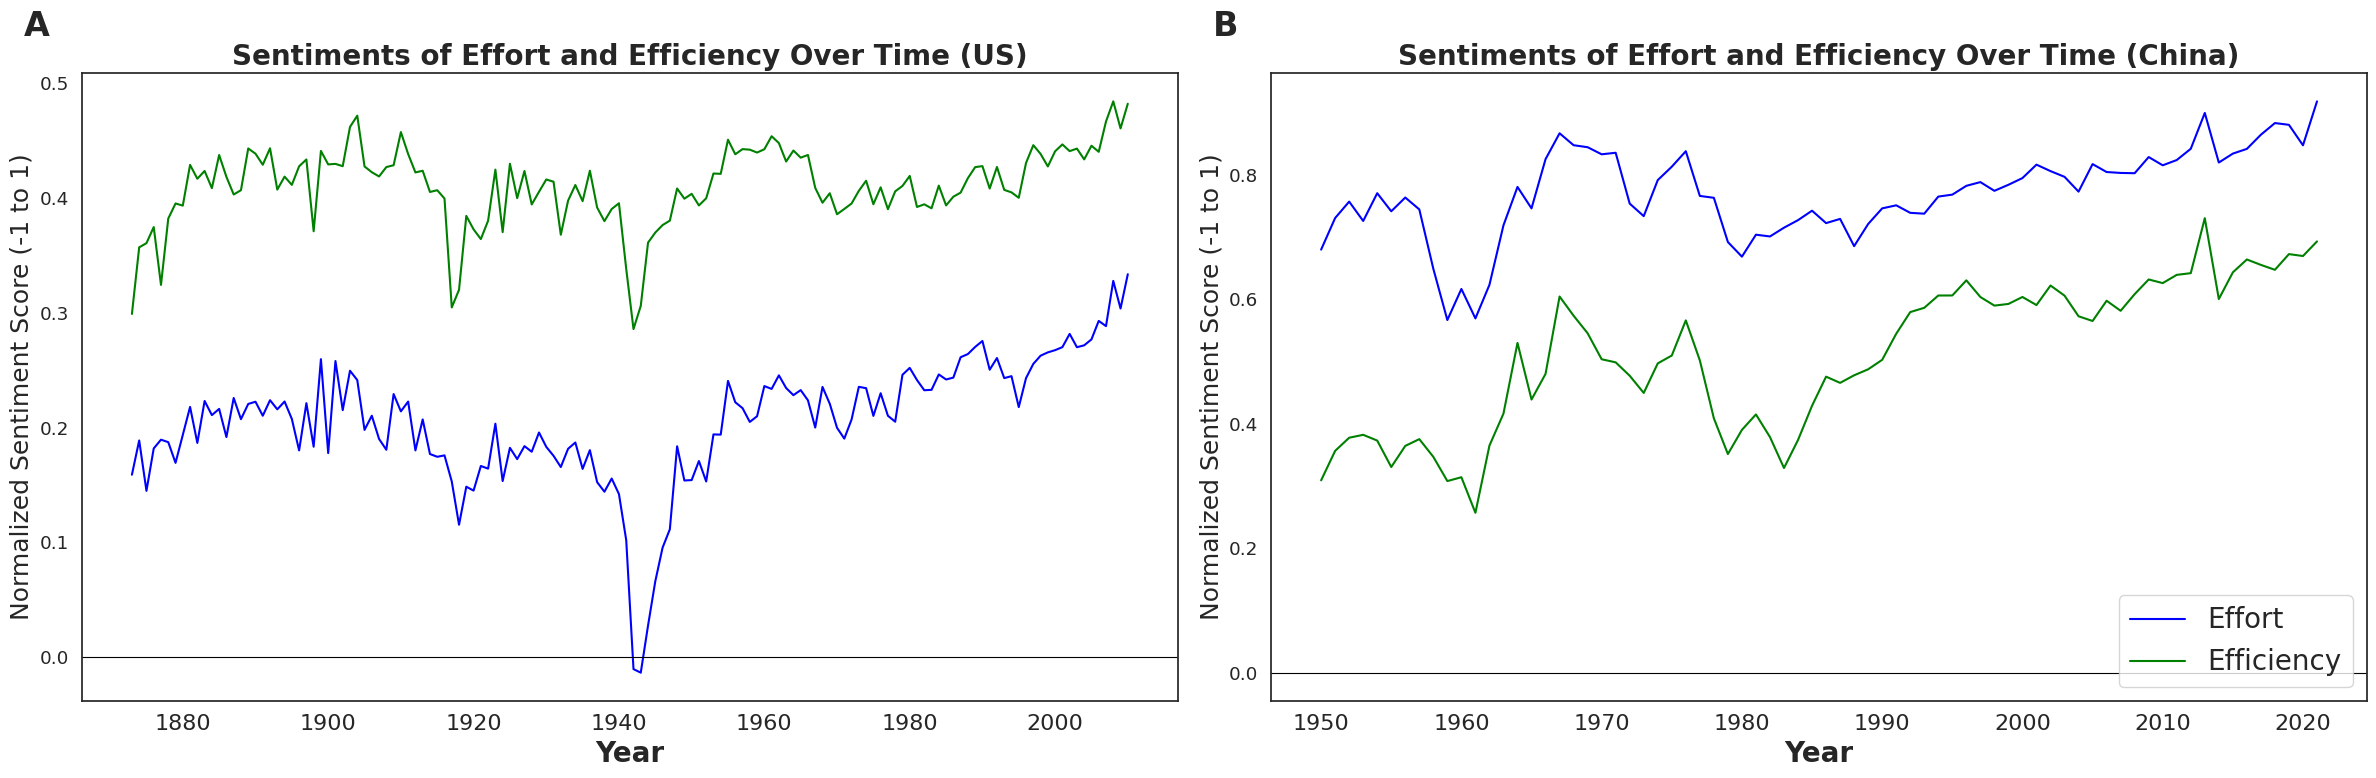

In [13]:
# load data
df_efficiency_us = pd.read_csv(os.path.join(pipeline_folder_path, 'sentiments_efficiency.csv'))
df_effort_us = pd.read_csv(os.path.join(pipeline_folder_path, 'sentiments_effort.csv'))
df_efficiency_chi = pd.read_csv(os.path.join(pipeline_folder_path, 'sentiments_efficiency_chi.csv'))
df_effort_chi = pd.read_csv(os.path.join(pipeline_folder_path, 'sentiments_effort_chi.csv'))


plt.figure(figsize=(24, 8), facecolor='white')

# US Data Plot (VADER)
ax1 = plt.subplot(1, 2, 1)
ax1.plot(df_effort_us['Year'], df_effort_us['MeanCompound'], label='Effort', color='blue')
ax1.plot(df_efficiency_us['Year'], df_efficiency_us['MeanCompound'], label='Efficiency', color='green')
ax1.axhline(0, color='black', linewidth=0.8)  # Neutral line at y = 0
ax1.set_title('Sentiments of Effort and Efficiency Over Time (US)',fontweight='bold',fontsize=20)
ax1.set_xlabel('Year',fontweight='bold',fontsize=20)
ax1.set_ylabel('Normalized Sentiment Score (-1 to 1)',fontsize = 18)
# ax1.legend(fontsize=20)
# increase x-tick font size
ax1.tick_params(axis='x', labelsize=16)
ax1.text(-0.03, 1.1, 'A', transform=ax1.transAxes, fontsize=24, fontweight='bold', va='top', ha='right')



# China Data Plot (SnowNLP, adjusted to -1 to 1 range)
ax2 = plt.subplot(1, 2, 2)
ax2.plot(df_effort_chi['Year'], 2 * df_effort_chi['AverageSentiment'] - 1, label='Effort', color='blue')
ax2.plot(df_efficiency_chi['Year'], 2 * df_efficiency_chi['AverageSentiment'] - 1, label='Efficiency', color='green')
ax2.axhline(0, color='black', linewidth=0.8)  # Neutral line at y = 0
ax2.set_title('Sentiments of Effort and Efficiency Over Time (China)',fontweight='bold',fontsize=20)
ax2.set_xlabel('Year',fontweight='bold',fontsize=20)
ax2.set_ylabel('Normalized Sentiment Score (-1 to 1)',fontsize = 18)
# increase x-tick font size
ax2.tick_params(axis='x', labelsize=16)
ax2.text(-0.03, 1.1, 'B', transform=ax2.transAxes, fontsize=24, fontweight='bold', va='top', ha='right')


# put legend at the bottom right
plt.legend(loc='lower right',fontsize=20)

plt.tight_layout()
# save the figure
plt.savefig(os.path.join(replication_plot_folder_path, 'SF7.jpg'), dpi=600,format='jpg',  bbox_inches='tight')

plt.show()

# Supplementary Figure 8: Compared with pruned dictionaries

Correlation of Effort between original and pruned dictionaries: r=1.00, p=0.000
Correlation of Efficiency between original and pruned dictionaries: r=0.99, p=0.000
Correlation of Inefficient Effort between original and pruned dictionaries: r=0.93, p=0.000
Correlation of Effort between original and pruned dictionaries: r=1.00, p=0.000
Correlation of Efficiency between original and pruned dictionaries: r=1.00, p=0.000
Correlation of Inefficient Effort between original and pruned dictionaries: r=1.00, p=0.000


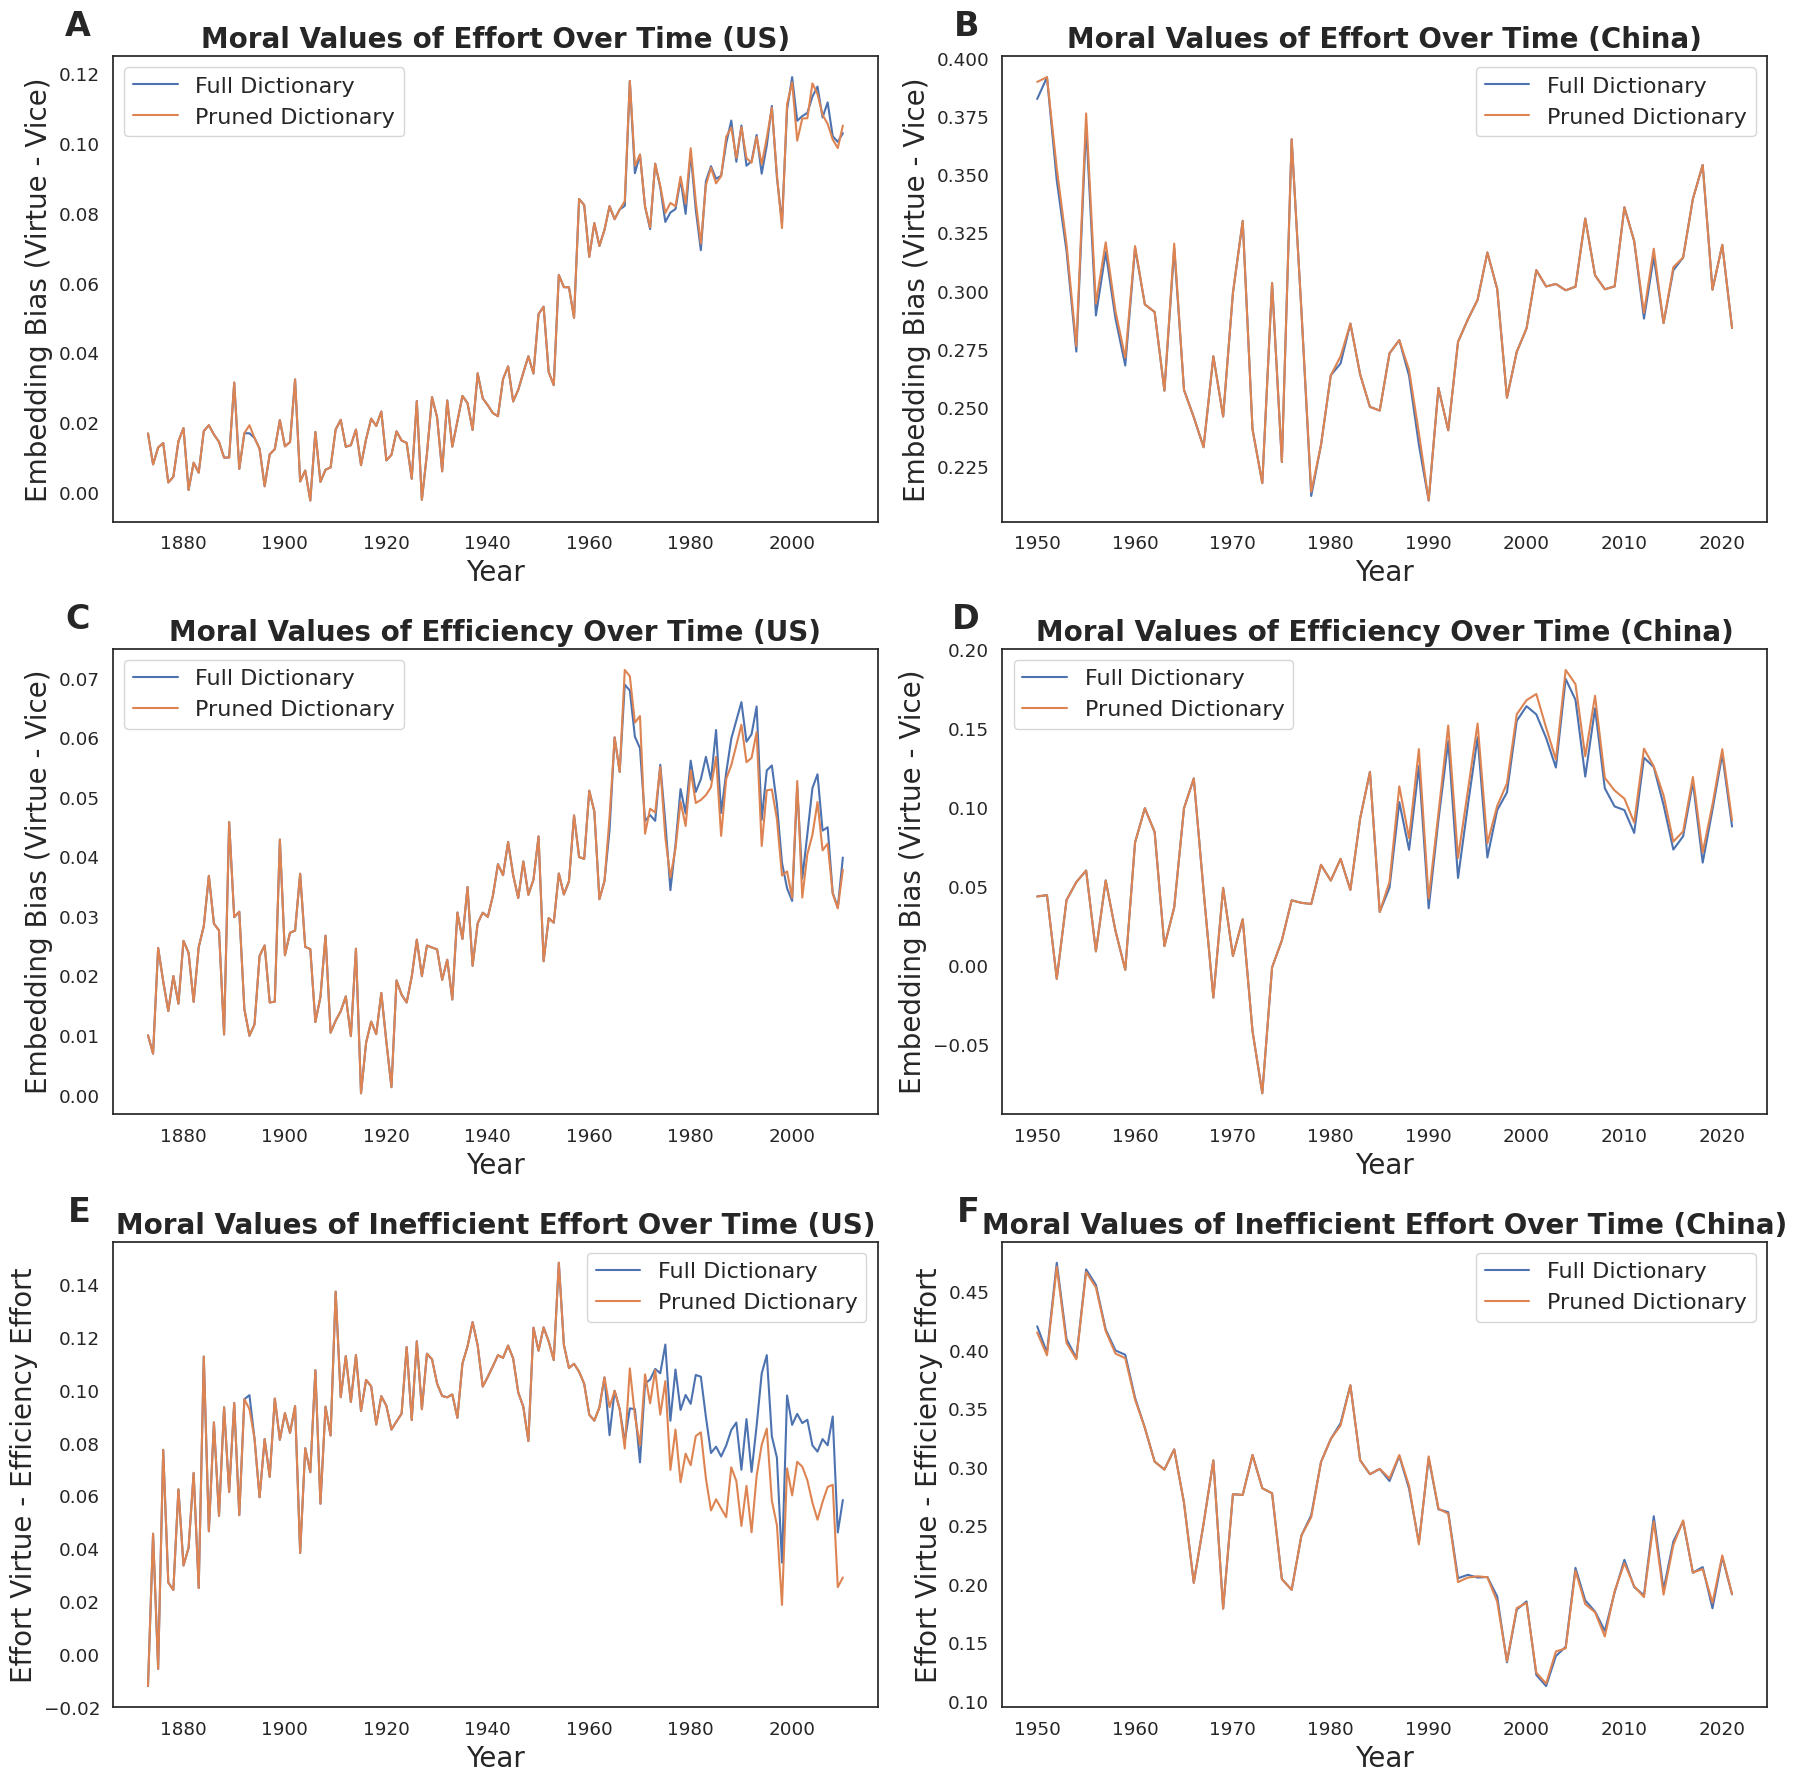

In [14]:
from scipy.stats import pearsonr
# load data
dfus = pd.read_csv('../2_pipeline/preprocessed/foundations_deletemissing.csv')
dfchi = pd.read_csv('../2_pipeline/preprocessed/foundations_chi_deletemissing.csv')
dfus['inefficient_effort'] = dfus['effort_virtue'] - dfus['efficiency_virtue']
dfchi['inefficient_effort'] = dfchi['effort_virtue'] - dfchi['efficiency_virtue']

dfus_ori = pd.read_csv('../2_pipeline/out/merged_us.csv')
dfchi_ori = pd.read_csv('../2_pipeline/out/merged_chi.csv')
dfus_ori['inefficient_effort'] = dfus_ori['effort_virtue'] - dfus_ori['efficiency_virtue']
dfchi_ori['inefficient_effort'] = dfchi_ori['effort_virtue'] - dfchi_ori['efficiency_virtue']
  
def compare_before_after(dfbefore, dfafter, var, varname, ax, ylabel="Embedding Bias (Virtue - Vice)", subplotlabel='A', country='US'):
    # Merge the two DataFrames on 'year' and keep only matched rows
    df_merge = pd.merge(dfbefore, dfafter, on='year', how='inner', suffixes=('_orig', '_pruned'))
    
    # Perform the correlation test
    stat, p = pearsonr(df_merge[f'{var}_orig'], df_merge[f'{var}_pruned'])
    print(f"Correlation of {varname} between original and pruned dictionaries: r={stat:.2f}, p={p:.3f}")
    
    # Plot the results
    sns.lineplot(data=df_merge, x='year', y=f'{var}_orig', label='Full Dictionary', ax=ax)
    sns.lineplot(data=df_merge, x='year', y=f'{var}_pruned', label='Pruned Dictionary', ax=ax)
    ax.set_title(f'Moral Values of {varname} Over Time ({country})', fontweight='bold', fontsize=20)
    ax.text(-0.03, 1.1, subplotlabel, transform=ax.transAxes, fontsize=24, fontweight='bold', va='top', ha='right')
    ax.set_ylabel(ylabel if varname != 'Inefficient Effort' else 'Effort Virtue - Efficiency Effort', fontsize=20)
    ax.set_xlabel('Year', fontsize=20)
    ax.legend(fontsize=16)

# Set up a larger figure to hold all subplots
fig, axs = plt.subplots(3, 2, figsize=(18, 18))  # 3 rows, 2 columns

# Adjust the order of subplots to put US on the first column and China on the second column
# US Data
compare_before_after(dfus_ori, dfus, 'effort_vir_vic_diff', 'Effort', axs[0, 0], subplotlabel='A')
compare_before_after(dfus_ori, dfus, 'efficiency_vir_vic_diff', 'Efficiency', axs[1, 0], subplotlabel='C')
compare_before_after(dfus_ori, dfus, 'inefficient_effort', 'Inefficient Effort', axs[2, 0], subplotlabel='E')

# Chinese Data
compare_before_after(dfchi_ori, dfchi, 'effort_vir_vic_diff', 'Effort', axs[0, 1], subplotlabel='B', country='China')
compare_before_after(dfchi_ori, dfchi, 'efficiency_vir_vic_diff', 'Efficiency', axs[1, 1], subplotlabel='D', country='China')
compare_before_after(dfchi_ori, dfchi, 'inefficient_effort', 'Inefficient Effort', axs[2, 1], subplotlabel='F', country='China')

plt.tight_layout()
# save the figure
plt.savefig(os.path.join(replication_plot_folder_path, 'SF8.jpg'), dpi=600,format='jpg',  bbox_inches='tight')

plt.show()